# Project - Analyzing NYC High School Data

### Objectives:

- Investigate possible relationships (correlations) between SAT scores and demographic factors (e.g. race, gender)


- Find out if the AP exam information is correlated with the SAT scores across high schools


- Parse the latitude and longitude coordinates for each school. This will enable us to map the schools and uncover any geographic patterns in the data

One of the most controversial issues in the U.S. educational system is the efficacy of standardized tests, and whether they're unfair to certain groups. Investigating the correlations between __SAT__ scores and demographics might be an interesting angle to take.

The [SAT, or Scholastic Aptitude Test](https://en.wikipedia.org/wiki/SAT), is an exam that U.S. high school students take before applying to college. Colleges take the test scores into account when deciding who to admit, so it's fairly important to perform well on it.

The test consists of three sections, each of which has 800 possible points. The combined score is out of 2,400 possible points (while this number has changed a few times, the data set for our project is based on 2,400 total points). Organizations often rank high schools by their average SAT scores. The scores are also considered a measure of overall school district quality.

New York City makes its [data on high school SAT scores](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) available online, as well as the [demographics for each high school](https://data.cityofnewyork.us/Education/DOE-High-School-Directory-2014-2015/n3p6-zve2).

Unfortunately, combining both of the data sets won't give us all of the demographic information we want to use. We'll need to supplement our data with other sources to do our full analysis.

The same website has several related data sets covering demographic information and test scores. Here are the links to all of the data sets we'll be using:

* [SAT scores by school](https://data.cityofnewyork.us/Education/SAT-Results/f9bf-2cp4) - SAT scores for each high school in New York City


* [High School Directory](https://data.cityofnewyork.us/Education/2014-2015-DOE-High-School-Directory/n3p6-zve2) - Directory of NYC High Schools


* [Class size](https://data.cityofnewyork.us/Education/2010-2011-Class-Size-School-level-detail/urz7-pzb3) - Information on class size for each school


* [AP test results](https://data.cityofnewyork.us/Education/AP-College-Board-2010-School-Level-Results/itfs-ms3e) - Advanced Placement (AP) exam results for each high school (passing an optional AP exam in a particular subject can earn a student college credit in that subject)


* [Graduation outcomes](https://data.cityofnewyork.us/Education/Graduation-Outcomes-Classes-Of-2005-2010-School-Le/vh2h-md7a) - The percentage of students who graduated, and other outcome information


* [Demographics](https://data.cityofnewyork.us/Education/School-Demographics-and-Accountability-Snapshot-20/ihfw-zy9j) - Demographic information for each school

All of these data sets are interrelated. We'll need to combine them into a single data set before we can find correlations.

## Background Research Findings

- Only high school students take the SAT, so we'll want to focus on high schools.


- New York City is made up of five boroughs, which are essentially distinct regions.


- New York City schools fall within several different school districts, each of which can contains dozens of schools.


- Each school in New York City has a unique code called a __DBN__, or district borough number.


- Aggregating data by district will allow us to use the district mapping data to plot district-by-district differences.

## Reading in the Data

* ap_2010.csv - Data on AP test results


* class_size.csv - Data on class size


* demographics.csv - Data on demographics


* graduation.csv - Data on graduation outcomes


* hs_directory.csv - A directory of high schools


* sat_results.csv - Data on SAT scores

Let's read each file into a pandas dataframe, and then store all of the dataframes in a dictionary.

In [1]:
import pandas as pd

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}


for item in data_files:
    name = item.split(".")[0]
    #print(name)
    df = pd.read_csv(item)
    print(">>> ", name, ":")
    df.info()
    data[name] = df
    print("\n")


>>>  ap_2010 :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
DBN                                     258 non-null object
SchoolName                              258 non-null object
AP Test Takers                          233 non-null float64
Total Exams Taken                       233 non-null float64
Number of Exams with scores 3 4 or 5    151 non-null float64
dtypes: float64(3), object(2)
memory usage: 10.2+ KB


>>>  class_size :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 16 columns):
CSD                                     27611 non-null int64
BOROUGH                                 27611 non-null object
SCHOOL CODE                             27611 non-null object
SCHOOL NAME                             27611 non-null object
GRADE                                   26127 non-null object
PROGRAM TYPE                            26127 non-null object
CORE SUBJECT (MS CORE and

In [2]:
print(data.keys())

dict_keys(['ap_2010', 'class_size', 'demographics', 'graduation', 'hs_directory', 'sat_results'])


In [3]:
print(data.values())

dict_values([        DBN                                         SchoolName  \
0    01M448                       UNIVERSITY NEIGHBORHOOD H.S.   
1    01M450                             EAST SIDE COMMUNITY HS   
2    01M515                                LOWER EASTSIDE PREP   
3    01M539                     NEW EXPLORATIONS SCI,TECH,MATH   
4    02M296              High School of Hospitality Management   
..      ...                                                ...   
253  31R605                         STATEN ISLAND TECHNICAL HS   
254  32K545                      EBC-HS FOR PUB SERVICE (BUSH)   
255  32K552                          Academy of Urban Planning   
256  32K554               All City Leadership Secondary School   
257  32K556  Bushwick Leaders High School for Academic Exce...   

     AP Test Takers   Total Exams Taken  Number of Exams with scores 3 4 or 5  
0               39.0               49.0                                  10.0  
1               19.0              

## Exploring the SAT Data

What we're mainly interested in is the SAT data set, which corresponds to the dictionary key `sat_results`. This data set contains the SAT scores for each high school in New York City. We eventually want to correlate selected information from this data set with information in the other data sets.

In [4]:
data["sat_results"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    478 non-null object
SAT Math Avg. Score                478 non-null object
SAT Writing Avg. Score             478 non-null object
dtypes: object(6)
memory usage: 22.5+ KB


In [5]:
#print( data["sat_results"].head() )
print( data["sat_results"].loc[0] )

print("\n")
print( data["sat_results"].loc[1] )


DBN                                                                       01M292
SCHOOL NAME                        HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES
Num of SAT Test Takers                                                        29
SAT Critical Reading Avg. Score                                              355
SAT Math Avg. Score                                                          404
SAT Writing Avg. Score                                                       363
Name: 0, dtype: object


DBN                                                             01M448
SCHOOL NAME                        UNIVERSITY NEIGHBORHOOD HIGH SCHOOL
Num of SAT Test Takers                                              91
SAT Critical Reading Avg. Score                                    383
SAT Math Avg. Score                                                423
SAT Writing Avg. Score                                             366
Name: 1, dtype: object


### Observation:
We may eventually want to combine the three columns that contain SAT scores -- `SAT Critical Reading Avg. Score`, `SAT Math Avg. Score`, and `SAT Writing Avg. Score` -- into a single column to make the scores easier to analyze.

## Exploring the Remaining Data

In [6]:
for key, df in data.items():
    print(">>> ", key, ":")
    df.info()
    print("\n")
    print( df.loc[0] )
    print("\n")
    print( df.loc[1] )
    print("\n")


>>>  ap_2010 :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 5 columns):
DBN                                     258 non-null object
SchoolName                              258 non-null object
AP Test Takers                          233 non-null float64
Total Exams Taken                       233 non-null float64
Number of Exams with scores 3 4 or 5    151 non-null float64
dtypes: float64(3), object(2)
memory usage: 10.2+ KB


DBN                                                           01M448
SchoolName                              UNIVERSITY NEIGHBORHOOD H.S.
AP Test Takers                                                    39
Total Exams Taken                                                 49
Number of Exams with scores 3 4 or 5                              10
Name: 0, dtype: object


DBN                                                     01M450
SchoolName                              EAST SIDE COMMUNITY HS
AP Test Takers             

### Observations:

- Each data set appears to either have a `DBN` column, or the information we need to create one. That means we can use a `DBN` column to combine the data sets. First we'll pinpoint matching rows from different data sets by looking for identical `DBN`s, then group all of their columns together in a single data set.


- Some fields look interesting for mapping -- particularly `Location 1` (hs_directory.csv), which contains coordinates inside a larger string.


- Some of the data sets appear to contain multiple rows for each school (because the rows have duplicate `DBN` values). That means we’ll have to do some preprocessing to ensure that each DBN is unique within each data set. If we don't do this, we'll run into problems when we combine the data sets, because we might be merging two rows in one data set with one row in another data set.


## Inserting DBN Fields

The only dataframe that __does not__ contain the "DBN" column is:  `class_size`

However we can "build" a DBN column by concatenating two columns: CSD and SCHOOL CODE.

* Note: We will need to add a leading 0 to "CSD" if the latter is less than two digits. We can use `str.zfill()` to do this.


### > Exploring the `class_size` dataframe:

In [7]:
print( data["class_size"].iloc[:7, 0:6] )

   CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE
0    1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED
1    1       M        M015  P.S. 015 Roberto Clemente     0K          CTT
2    1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED
3    1       M        M015  P.S. 015 Roberto Clemente     01          CTT
4    1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED
5    1       M        M015  P.S. 015 Roberto Clemente     02          CTT
6    1       M        M015  P.S. 015 Roberto Clemente     03       GEN ED


In [8]:
def z_padd_str(num):
    str_1 = str(num)
    return str_1.zfill(2)


#print( data["class_size"]["CSD"].apply(z_padd_str) )
data["class_size"]["CSD_PADDED"] = data["class_size"]["CSD"].apply(z_padd_str)

data["class_size"]["DBN"] = data["class_size"]["CSD_PADDED"] + data["class_size"]["SCHOOL CODE"]

print( data["class_size"]["DBN"] )


0        01M015
1        01M015
2        01M015
3        01M015
4        01M015
          ...  
27606    32K564
27607    32K564
27608    32K564
27609    32K564
27610    32K564
Name: DBN, Length: 27611, dtype: object


### Next, 
Copy the "dbn" column in `hs_directory` into a new column called "DBN".


In [9]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

data["hs_directory"].dtypes


dbn                                  object
school_name                          object
boro                                 object
building_code                        object
phone_number                         object
fax_number                           object
grade_span_min                       object
grade_span_max                        int64
expgrade_span_min                    object
expgrade_span_max                   float64
bus                                  object
subway                               object
primary_address_line_1               object
city                                 object
state_code                           object
zip                                   int64
website                              object
total_students                      float64
campus_name                          object
school_type                          object
overview_paragraph                   object
program_highlights                   object
language_classes                

## Combining the SAT Scores

Let's create a column that totals up the SAT scores for the different sections of the exam. This will make it much easier to correlate scores with demographic factors because we'll be working with a single number, rather than three different ones.

First, we need to convert the `SAT Math Avg. Score`, `SAT Critical Reading Avg. Score`, and `SAT Writing Avg. Score` columns in the `sat_results` data set from the object (string) data type to a __numeric data type__.

*  We can use the `pandas.to_numeric()` method for the conversion. If we don't convert the values, we won't be able to add the columns together.
    * If we pass the keyword argument `errors="coerce"`, then it will replace all non-numeric values with NaN.

In [10]:
print( data["sat_results"]["SAT Critical Reading Avg. Score"] )

0      355
1      383
2      377
3      414
4      390
      ... 
473      s
474      s
475      s
476    496
477    367
Name: SAT Critical Reading Avg. Score, Length: 478, dtype: object


In [11]:
s_1 = pd.to_numeric(data["sat_results"]["SAT Critical Reading Avg. Score"], errors="coerce")

print(s_1)
print(type(s_1))


0      355.0
1      383.0
2      377.0
3      414.0
4      390.0
       ...  
473      NaN
474      NaN
475      NaN
476    496.0
477    367.0
Name: SAT Critical Reading Avg. Score, Length: 478, dtype: float64
<class 'pandas.core.series.Series'>


In [12]:
s_2 = pd.to_numeric(data["sat_results"]["SAT Math Avg. Score"], errors="coerce")

print(s_2)
print(type(s_2))


0      404.0
1      423.0
2      402.0
3      401.0
4      433.0
       ...  
473      NaN
474      NaN
475      NaN
476    400.0
477    370.0
Name: SAT Math Avg. Score, Length: 478, dtype: float64
<class 'pandas.core.series.Series'>


In [13]:
s_3 = pd.to_numeric(data["sat_results"]["SAT Writing Avg. Score"], errors="coerce")

print(s_3)
print(type(s_3))


0      363.0
1      366.0
2      370.0
3      359.0
4      384.0
       ...  
473      NaN
474      NaN
475      NaN
476    426.0
477    360.0
Name: SAT Writing Avg. Score, Length: 478, dtype: float64
<class 'pandas.core.series.Series'>


Now, let's create a new column called "sat_score" that contains the sum of those 3 columns:

In [14]:
data["sat_results"]["sat_score"] = s_1 + s_2 + s_3

print(data["sat_results"]["sat_score"])
print(type(data["sat_results"]["sat_score"]))


0      1122.0
1      1172.0
2      1149.0
3      1174.0
4      1207.0
        ...  
473       NaN
474       NaN
475       NaN
476    1322.0
477    1097.0
Name: sat_score, Length: 478, dtype: float64
<class 'pandas.core.series.Series'>


## Parsing Geographic Coordinates for Schools

Next, we'll want to parse the __latitude__ and __longitude__ coordinates for each school. This will enable us to map the schools and uncover any geographic patterns in the data. The coordinates are currently in the column `Location 1` in the `hs_directory` data set.


In [15]:
print( data["hs_directory"].loc[:5, "Location 1"] )

0    883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...
1    1110 Boston Road\nBronx, NY 10456\n(40.8276026...
2    1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...
3    411 Pearl Street\nNew York, NY 10038\n(40.7106...
4    160-20 Goethals Avenue\nJamaica, NY 11432\n(40...
5    3000 East Tremont Avenue\nBronx, NY 10461\n(40...
Name: Location 1, dtype: object


In [16]:
print( data["hs_directory"]["Location 1"].isnull().sum() )

0


In [17]:
print( data["hs_directory"].loc[0, "Location 1"] )

883 Classon Avenue
Brooklyn, NY 11225
(40.67029890700047, -73.96164787599963)


Next, let's extract the __latitude__ and __longitude__. I will create two new columns.

In [18]:
pattern = r"\((?P<Latitude>-?\d+\.\d+),\s+(?P<Longitude>-?\d+\.\d+)\)"

latitudes_and_longitudes = data["hs_directory"]["Location 1"].str.extract(pattern)

print(latitudes_and_longitudes)
print(type(latitudes_and_longitudes))


               Latitude           Longitude
0     40.67029890700047  -73.96164787599963
1      40.8276026690005  -73.90447525699966
2    40.842414068000494  -73.91616158599965
3     40.71067947100045  -74.00080702099967
4    40.718810094000446  -73.80650045499965
..                  ...                 ...
430   40.85464659900049  -73.89664555299964
431   40.85969831600045  -73.86074140399967
432   40.87575421100047  -73.86138783399963
433   40.70523493900049  -74.01331503999967
434   40.73440841000047  -73.82141748299966

[435 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>


In [19]:
latitudes_and_longitudes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 2 columns):
Latitude     435 non-null object
Longitude    435 non-null object
dtypes: object(2)
memory usage: 6.9+ KB


In [20]:
print( latitudes_and_longitudes.isnull().sum() )

Latitude     0
Longitude    0
dtype: int64


### Next,
Let's convert the latitude and longitude values (from string) to a numeric dtype.

A couple of thoughts with regard to whether deciding to use `Series/DataFrame.astype()` or `pandas.to_numeric()`:

1. I believe it is better to use `pandas.to_numeric()` if we are not sure whether the series contains non numeric values or not; because if we pass the keyword argument `errors="coerce"`, then it will replace all non-numeric values with NaN.


2. In this case, I confirmed above that these columns does not contain null/missing values. Therefore I can use any of the two options. I decided to use `DataFrame.astype()`

In [21]:
latitudes_and_longitudes_float = latitudes_and_longitudes.astype('float')

In [22]:
latitudes_and_longitudes_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 2 columns):
Latitude     435 non-null float64
Longitude    435 non-null float64
dtypes: float64(2)
memory usage: 6.9 KB


In [23]:
print(latitudes_and_longitudes_float)

      Latitude  Longitude
0    40.670299 -73.961648
1    40.827603 -73.904475
2    40.842414 -73.916162
3    40.710679 -74.000807
4    40.718810 -73.806500
..         ...        ...
430  40.854647 -73.896646
431  40.859698 -73.860741
432  40.875754 -73.861388
433  40.705235 -74.013315
434  40.734408 -73.821417

[435 rows x 2 columns]


In [24]:
data["hs_directory"]["latitude"] = latitudes_and_longitudes_float["Latitude"]

In [25]:
data["hs_directory"]["longitude"] = latitudes_and_longitudes_float["Longitude"]

In [26]:
data["hs_directory"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 61 columns):
dbn                                 435 non-null object
school_name                         435 non-null object
boro                                435 non-null object
building_code                       435 non-null object
phone_number                        435 non-null object
fax_number                          423 non-null object
grade_span_min                      435 non-null object
grade_span_max                      435 non-null int64
expgrade_span_min                   33 non-null object
expgrade_span_max                   33 non-null float64
bus                                 434 non-null object
subway                              358 non-null object
primary_address_line_1              435 non-null object
city                                435 non-null object
state_code                          435 non-null object
zip                                 435 non-null int64
we

## Verify that the values in the `DBN` column are unique in each dataset

In [27]:
bool_1 = data["sat_results"]["DBN"] == "01M292"

print( data["sat_results"][bool_1] )


      DBN                                    SCHOOL NAME  \
0  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   

  Num of SAT Test Takers SAT Critical Reading Avg. Score SAT Math Avg. Score  \
0                     29                             355                 404   

  SAT Writing Avg. Score  sat_score  
0                    363     1122.0  


In [28]:
bool_1 = data["class_size"]["DBN"] == "01M292"

#print( data["class_size"][bool_1] )
print( data["class_size"][bool_1].iloc[0] )

print("\n")
print( data["class_size"][bool_1].shape )


CSD                                                                                 1
BOROUGH                                                                             M
SCHOOL CODE                                                                      M292
SCHOOL NAME                             Henry Street School for International Studies
GRADE                                                                              06
PROGRAM TYPE                                                                      CTT
CORE SUBJECT (MS CORE and 9-12 ONLY)                                                -
CORE COURSE (MS CORE and 9-12 ONLY)                                                 -
SERVICE CATEGORY(K-9* ONLY)                                                         -
NUMBER OF STUDENTS / SEATS FILLED                                                  21
NUMBER OF SECTIONS                                                                  1
AVERAGE CLASS SIZE                                    

### > Duplicate rows
I want to see (actually __confirm__) if there are duplicate rows with the same key ("DBN" column) in each dataframe.

In [29]:
for key, df in data.items():
    print(">>> ", key, ":")
    dups_bool = df.duplicated("DBN")
    dups_count = dups_bool.sum()
    
    if dups_count == 0:
        print("- No duplicates")
    elif dups_count > 0:
        print("- Total number of duplicates:", dups_count)
    
    print("\n")


>>>  ap_2010 :
- Total number of duplicates: 1


>>>  class_size :
- Total number of duplicates: 26124


>>>  demographics :
- Total number of duplicates: 8481


>>>  graduation :
- Total number of duplicates: 24673


>>>  hs_directory :
- No duplicates


>>>  sat_results :
- No duplicates




From the above result, we can see/confirm that there are __three__ dataframes (data sets) with a significant number of duplicate rows with the same key ("DBN" column).

### > Condensing the `ap_2010` dataset

In [30]:
dups_bool = data["ap_2010"].duplicated("DBN")

print( "Total number of duplicates:", dups_bool.sum() )

dups = data["ap_2010"][dups_bool]

print("\n")
print( dups )
print( type(dups) )


# Testing how to get just the value from column "DBN" (in the dups dataframe):
print("\n")
print( dups["DBN"][52] )
print( dups.index )

print( dups["DBN"] )
print( type(dups["DBN"]) )

print("\n")
print( dups["DBN"].iloc[0] )


# Finally printing the duplicated rows:
print("\n")
print( data["ap_2010"][data["ap_2010"]["DBN"] == dups["DBN"].iloc[0]] )


Total number of duplicates: 1


       DBN                    SchoolName  AP Test Takers   Total Exams Taken  \
52  04M610  YOUNG WOMEN'S LEADERSHIP SCH              NaN                NaN   

    Number of Exams with scores 3 4 or 5  
52                                   NaN  
<class 'pandas.core.frame.DataFrame'>


04M610
Int64Index([52], dtype='int64')
52    04M610
Name: DBN, dtype: object
<class 'pandas.core.series.Series'>


04M610


       DBN                                         SchoolName  \
51  04M610  THE YOUNG WOMEN'S LEADERSHIP SCHOOL OF EAST HA...   
52  04M610                       YOUNG WOMEN'S LEADERSHIP SCH   

    AP Test Takers   Total Exams Taken  Number of Exams with scores 3 4 or 5  
51             41.0               55.0                                  29.0  
52              NaN                NaN                                   NaN  


### Next, 
Let's drop/remove the duplicate row (index = 52).

In [31]:
data["ap_2010"].drop_duplicates("DBN", inplace=True)

dups_bool = data["ap_2010"].duplicated("DBN")

print( "Total number of duplicates:", dups_bool.sum() )


Total number of duplicates: 0


### > Condensing the `class_size` dataset

In [32]:
dups_bool = data["class_size"].duplicated("DBN")

print( "Total number of duplicates:", dups_bool.sum() )

dups = data["class_size"][dups_bool]

print("\n")
print( dups )
print( type(dups) )


Total number of duplicates: 26124


       CSD BOROUGH SCHOOL CODE                     SCHOOL NAME GRADE   \
1        1       M        M015       P.S. 015 Roberto Clemente     0K   
2        1       M        M015       P.S. 015 Roberto Clemente     01   
3        1       M        M015       P.S. 015 Roberto Clemente     01   
4        1       M        M015       P.S. 015 Roberto Clemente     02   
5        1       M        M015       P.S. 015 Roberto Clemente     02   
...    ...     ...         ...                             ...    ...   
27606   32       K        K564  Bushwick Community High School  09-12   
27607   32       K        K564  Bushwick Community High School  09-12   
27608   32       K        K564  Bushwick Community High School  09-12   
27609   32       K        K564  Bushwick Community High School  09-12   
27610   32       K        K564  Bushwick Community High School    NaN   

      PROGRAM TYPE CORE SUBJECT (MS CORE and 9-12 ONLY)  \
1              CTT          

In [33]:
dbn_unique_values = dups["DBN"].unique()

print( dbn_unique_values )
print( type(dbn_unique_values) )
print( dbn_unique_values.shape )
print( dbn_unique_values.size )

print("\n")
print( "Array stores elements of type:", dbn_unique_values.dtype )


['01M015' '01M019' '01M020' ... '32K554' '32K556' '32K564']
<class 'numpy.ndarray'>
(1487,)
1487


Array stores elements of type: object


In [34]:
print( data["class_size"][data["class_size"]["DBN"] == dbn_unique_values[0]] )


    CSD BOROUGH SCHOOL CODE                SCHOOL NAME GRADE  PROGRAM TYPE  \
0     1       M        M015  P.S. 015 Roberto Clemente     0K       GEN ED   
1     1       M        M015  P.S. 015 Roberto Clemente     0K          CTT   
2     1       M        M015  P.S. 015 Roberto Clemente     01       GEN ED   
3     1       M        M015  P.S. 015 Roberto Clemente     01          CTT   
4     1       M        M015  P.S. 015 Roberto Clemente     02       GEN ED   
5     1       M        M015  P.S. 015 Roberto Clemente     02          CTT   
6     1       M        M015  P.S. 015 Roberto Clemente     03       GEN ED   
7     1       M        M015  P.S. 015 Roberto Clemente     03          CTT   
8     1       M        M015  P.S. 015 Roberto Clemente     04       GEN ED   
9     1       M        M015  P.S. 015 Roberto Clemente     05       GEN ED   
10    1       M        M015  P.S. 015 Roberto Clemente  0K-09      SPEC ED   
11    1       M        M015  P.S. 015 Roberto Clemente    NaN   

First, let's rename column 'GRADE ' (which has a trailing space).


In [35]:
data["class_size"].columns

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE ',
       'PROGRAM TYPE', 'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'CSD_PADDED', 'DBN'],
      dtype='object')

In [36]:
data["class_size"].rename(columns={'GRADE ': 'GRADE'}, inplace=True)

In [37]:
data["class_size"].columns

Index(['CSD', 'BOROUGH', 'SCHOOL CODE', 'SCHOOL NAME', 'GRADE', 'PROGRAM TYPE',
       'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       'CORE COURSE (MS CORE and 9-12 ONLY)', 'SERVICE CATEGORY(K-9* ONLY)',
       'NUMBER OF STUDENTS / SEATS FILLED', 'NUMBER OF SECTIONS',
       'AVERAGE CLASS SIZE', 'SIZE OF SMALLEST CLASS', 'SIZE OF LARGEST CLASS',
       'DATA SOURCE', 'SCHOOLWIDE PUPIL-TEACHER RATIO', 'CSD_PADDED', 'DBN'],
      dtype='object')

### Now,
Let's see what are the __unique values__ for columns: "GRADE" and "PROGRAM TYPE".

Column: __"GRADE"__

In [38]:
grade_unique_values = data["class_size"]["GRADE"].unique()

print(grade_unique_values)
print(grade_unique_values.size)


['0K' '01' '02' '03' '04' '05' '0K-09' nan '06' '07' '08' 'MS Core'
 '09-12' '09']
14


Because we're dealing with high schools, we're only concerned with grades 9 through 12. That means we only want to pick rows where the value in the "GRADE" column is `09-12`.

Let's start to perform __data cleaning__ tasks (like the one above) but store the results on a new variable called `class_size`. In other words, let's start to __condense__ the `class_size` data set.

In [39]:
data["class_size"].shape

(27611, 18)

In [40]:
pattern = r"^09-12$"

hs_grades_bool = data["class_size"]["GRADE"].str.contains(pattern, na=False)
# or   (in this particular case)
#hs_grades_bool = data["class_size"]["GRADE"] == "09-12"

print( hs_grades_bool.sum() )

print("\n", hs_grades_bool.value_counts(dropna=False))


10644

 False    16967
True     10644
Name: GRADE, dtype: int64


In [41]:
class_size = data["class_size"][hs_grades_bool]

class_size.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10644 entries, 225 to 27609
Data columns (total 18 columns):
CSD                                     10644 non-null int64
BOROUGH                                 10644 non-null object
SCHOOL CODE                             10644 non-null object
SCHOOL NAME                             10644 non-null object
GRADE                                   10644 non-null object
PROGRAM TYPE                            10644 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    10644 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     10644 non-null object
SERVICE CATEGORY(K-9* ONLY)             10644 non-null object
NUMBER OF STUDENTS / SEATS FILLED       10644 non-null float64
NUMBER OF SECTIONS                      10644 non-null float64
AVERAGE CLASS SIZE                      10644 non-null float64
SIZE OF SMALLEST CLASS                  10644 non-null float64
SIZE OF LARGEST CLASS                   10644 non-null float64
DATA SOURCE      

Column: __"PROGRAM TYPE"__

In [42]:
program_type_unique_values = class_size["PROGRAM TYPE"].unique()

print(program_type_unique_values)
print(program_type_unique_values.size)


['GEN ED' 'CTT' 'SPEC ED']
3


In [43]:
print( class_size["PROGRAM TYPE"].value_counts(dropna=False) )


GEN ED     6513
CTT        2953
SPEC ED    1178
Name: PROGRAM TYPE, dtype: int64


Each school can have multiple program types. Because `GEN ED` is the largest category by far, let's only select rows where "PROGRAM TYPE" is `GEN ED`.

### Next,
Let's check again for duplicate rows with the same key ("DBN" column):

In [44]:
dups_bool = data["class_size"].duplicated("DBN")

print( "Total number of duplicates (BEFORE):", dups_bool.sum() )


dups_bool = class_size.duplicated("DBN")

print( "Total number of duplicates (AFTER):", dups_bool.sum() )


Total number of duplicates (BEFORE): 26124
Total number of duplicates (AFTER): 10054


In [45]:
dups = class_size[dups_bool]

dbn_unique_values = dups["DBN"].unique()

#print( dbn_unique_values )
#print( type(dbn_unique_values) )
#print( dbn_unique_values.shape )
print( dbn_unique_values.size )

#print("\n")
#print( "Array stores elements of type:", dbn_unique_values.dtype )

print("\n")
print( class_size[class_size["DBN"] == dbn_unique_values[0]] )


550


     CSD BOROUGH SCHOOL CODE                                    SCHOOL NAME  \
225    1       M        M292  Henry Street School for International Studies   
226    1       M        M292  Henry Street School for International Studies   
227    1       M        M292  Henry Street School for International Studies   
228    1       M        M292  Henry Street School for International Studies   
229    1       M        M292  Henry Street School for International Studies   
231    1       M        M292  Henry Street School for International Studies   
232    1       M        M292  Henry Street School for International Studies   
233    1       M        M292  Henry Street School for International Studies   
234    1       M        M292  Henry Street School for International Studies   
235    1       M        M292  Henry Street School for International Studies   
236    1       M        M292  Henry Street School for International Studies   
237    1       M        M292  Henry Street Sch

### Now,
Let's consider only the rows that have a "PROGRAM TYPE" = `GEN ED`.

In [46]:
hs_program_type_bool = class_size["PROGRAM TYPE"] == "GEN ED"

class_size = class_size[hs_program_type_bool]

class_size.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6513 entries, 225 to 27608
Data columns (total 18 columns):
CSD                                     6513 non-null int64
BOROUGH                                 6513 non-null object
SCHOOL CODE                             6513 non-null object
SCHOOL NAME                             6513 non-null object
GRADE                                   6513 non-null object
PROGRAM TYPE                            6513 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    6513 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     6513 non-null object
SERVICE CATEGORY(K-9* ONLY)             6513 non-null object
NUMBER OF STUDENTS / SEATS FILLED       6513 non-null float64
NUMBER OF SECTIONS                      6513 non-null float64
AVERAGE CLASS SIZE                      6513 non-null float64
SIZE OF SMALLEST CLASS                  6513 non-null float64
SIZE OF LARGEST CLASS                   6513 non-null float64
DATA SOURCE                     

In [47]:
dups_bool = class_size.duplicated("DBN")

print( "Total number of duplicates:", dups_bool.sum() )

dups = class_size[dups_bool]

dbn_unique_values = dups["DBN"].unique()

#print( dbn_unique_values )
#print( type(dbn_unique_values) )
#print( dbn_unique_values.shape )
print( dbn_unique_values.size )

#print("\n")
#print( "Array stores elements of type:", dbn_unique_values.dtype )

print("\n")
print( class_size[class_size["DBN"] == dbn_unique_values[0]] )


Total number of duplicates: 5930
503


     CSD BOROUGH SCHOOL CODE                                    SCHOOL NAME  \
225    1       M        M292  Henry Street School for International Studies   
226    1       M        M292  Henry Street School for International Studies   
227    1       M        M292  Henry Street School for International Studies   
228    1       M        M292  Henry Street School for International Studies   
229    1       M        M292  Henry Street School for International Studies   
231    1       M        M292  Henry Street School for International Studies   
232    1       M        M292  Henry Street School for International Studies   
233    1       M        M292  Henry Street School for International Studies   
234    1       M        M292  Henry Street School for International Studies   
235    1       M        M292  Henry Street School for International Studies   
236    1       M        M292  Henry Street School for International Studies   
237    1     

Since `DBN` still isn't completely unique (see above cell), let's take a look at the values inside column "CORE SUBJECT (MS CORE and 9-12 ONLY)":

In [48]:
core_subject_unique_values = class_size["CORE SUBJECT (MS CORE and 9-12 ONLY)"].unique()

print(core_subject_unique_values)
print(core_subject_unique_values.size)


['ENGLISH' 'MATH' 'SCIENCE' 'SOCIAL STUDIES']
4


In [49]:
print( class_size["CORE SUBJECT (MS CORE and 9-12 ONLY)"].value_counts(dropna=False) )


ENGLISH           1977
SCIENCE           1636
SOCIAL STUDIES    1453
MATH              1447
Name: CORE SUBJECT (MS CORE and 9-12 ONLY), dtype: int64


This column seems to include certain subjects. We want our `class_size` data to include every single class a school offers -- not just a subset of them. What we can do is take the __average__ across all of the classes a school offers. This will give us unique `DBN` values, while also incorporating as much data as possible into the average.

In [50]:
dbn_unique_values = class_size["DBN"].unique()

print( dbn_unique_values )
#print( type(dbn_unique_values) )
#print( dbn_unique_values.shape )
print( dbn_unique_values.size )

#print("\n")
#print( "Array stores elements of type:", dbn_unique_values.dtype )

#print("\n")
#print( class_size[class_size["DBN"] == dbn_unique_values[0]] )


['01M292' '01M332' '01M378' '01M448' '01M450' '01M458' '01M509' '01M515'
 '01M539' '01M650' '01M696' '02M047' '02M104' '02M126' '02M131' '02M255'
 '02M288' '02M294' '02M296' '02M298' '02M300' '02M303' '02M305' '02M308'
 '02M313' '02M316' '02M374' '02M376' '02M392' '02M393' '02M394' '02M399'
 '02M400' '02M408' '02M411' '02M412' '02M414' '02M416' '02M418' '02M419'
 '02M420' '02M425' '02M427' '02M429' '02M432' '02M437' '02M438' '02M439'
 '02M440' '02M449' '02M459' '02M460' '02M475' '02M489' '02M500' '02M519'
 '02M520' '02M529' '02M531' '02M542' '02M543' '02M544' '02M545' '02M550'
 '02M551' '02M575' '02M580' '02M586' '02M600' '02M605' '02M615' '02M620'
 '02M625' '02M630' '02M655' '03M054' '03M180' '03M241' '03M247' '03M256'
 '03M283' '03M299' '03M307' '03M334' '03M402' '03M403' '03M404' '03M415'
 '03M417' '03M470' '03M479' '03M485' '03M492' '03M494' '03M505' '03M541'
 '03M859' '03M860' '04M050' '04M372' '04M409' '04M435' '04M495' '04M555'
 '04M610' '04M635' '04M680' '05M285' '05M286' '05M3

In [51]:
grouped = class_size.groupby("DBN")

print( grouped )


In [52]:
_01M292_group = grouped.get_group("01M292")

print(_01M292_group)


     CSD BOROUGH SCHOOL CODE                                    SCHOOL NAME  \
225    1       M        M292  Henry Street School for International Studies   
226    1       M        M292  Henry Street School for International Studies   
227    1       M        M292  Henry Street School for International Studies   
228    1       M        M292  Henry Street School for International Studies   
229    1       M        M292  Henry Street School for International Studies   
231    1       M        M292  Henry Street School for International Studies   
232    1       M        M292  Henry Street School for International Studies   
233    1       M        M292  Henry Street School for International Studies   
234    1       M        M292  Henry Street School for International Studies   
235    1       M        M292  Henry Street School for International Studies   
236    1       M        M292  Henry Street School for International Studies   
237    1       M        M292  Henry Street School fo

In [53]:
print( grouped.mean() )

print( type(grouped.mean()) )


        CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
DBN                                                                  
01M292    1                          88.000000            4.000000   
01M332    1                          46.000000            2.000000   
01M378    1                          33.000000            1.000000   
01M448    1                         105.687500            4.750000   
01M450    1                          57.600000            2.733333   
...     ...                                ...                 ...   
32K549   32                          71.066667            3.266667   
32K552   32                         102.375000            4.312500   
32K554   32                          66.937500            3.812500   
32K556   32                         132.333333            5.400000   
32K564   32                         136.142857            5.428571   

        AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
DBN         

In [54]:
class_size_1 = grouped.mean()

class_size_1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 01M292 to 32K564
Data columns (total 7 columns):
CSD                                  583 non-null int64
NUMBER OF STUDENTS / SEATS FILLED    583 non-null float64
NUMBER OF SECTIONS                   583 non-null float64
AVERAGE CLASS SIZE                   583 non-null float64
SIZE OF SMALLEST CLASS               583 non-null float64
SIZE OF LARGEST CLASS                583 non-null float64
SCHOOLWIDE PUPIL-TEACHER RATIO       0 non-null float64
dtypes: float64(6), int64(1)
memory usage: 36.4+ KB


In [55]:
print( class_size_1.head() )

        CSD  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
DBN                                                                  
01M292    1                            88.0000            4.000000   
01M332    1                            46.0000            2.000000   
01M378    1                            33.0000            1.000000   
01M448    1                           105.6875            4.750000   
01M450    1                            57.6000            2.733333   

        AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  \
DBN                                                                         
01M292           22.564286                   18.50              26.571429   
01M332           22.000000                   21.00              23.500000   
01M378           33.000000                   33.00              33.000000   
01M448           22.231250                   18.25              27.062500   
01M450           21.200000                   19

As we notice above, our new dataframe (`class_size_1`) has the `DBN` values as the indexes/indices. Since we intend to use this dataframe to combine (`pandas.concat()`) it with the others, we need to add a new sequential index and make the current index (`DBN`) a column. We can attain the latter with `pandas.DataFrame.reset_index()`.

In [56]:
print( class_size_1.isnull().sum() )

CSD                                    0
NUMBER OF STUDENTS / SEATS FILLED      0
NUMBER OF SECTIONS                     0
AVERAGE CLASS SIZE                     0
SIZE OF SMALLEST CLASS                 0
SIZE OF LARGEST CLASS                  0
SCHOOLWIDE PUPIL-TEACHER RATIO       583
dtype: int64


I decided to remove these two columns:

- `CSD`: since it is contained within the `DBN`


- `SCHOOLWIDE PUPIL-TEACHER RATIO`: all rows in this dataframe contain missing values

In [57]:
class_size_1.drop(columns=['CSD', 'SCHOOLWIDE PUPIL-TEACHER RATIO'], inplace=True)

In [58]:
class_size_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 583 entries, 01M292 to 32K564
Data columns (total 5 columns):
NUMBER OF STUDENTS / SEATS FILLED    583 non-null float64
NUMBER OF SECTIONS                   583 non-null float64
AVERAGE CLASS SIZE                   583 non-null float64
SIZE OF SMALLEST CLASS               583 non-null float64
SIZE OF LARGEST CLASS                583 non-null float64
dtypes: float64(5)
memory usage: 27.3+ KB


In [59]:
print( class_size_1.head() )

        NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
DBN                                                             
01M292                            88.0000            4.000000   
01M332                            46.0000            2.000000   
01M378                            33.0000            1.000000   
01M448                           105.6875            4.750000   
01M450                            57.6000            2.733333   

        AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  
DBN                                                                        
01M292           22.564286                   18.50              26.571429  
01M332           22.000000                   21.00              23.500000  
01M378           33.000000                   33.00              33.000000  
01M448           22.231250                   18.25              27.062500  
01M450           21.200000                   19.40              22.866667  


In [60]:
class_size_1.reset_index(inplace=True)

In [61]:
class_size_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
DBN                                  583 non-null object
NUMBER OF STUDENTS / SEATS FILLED    583 non-null float64
NUMBER OF SECTIONS                   583 non-null float64
AVERAGE CLASS SIZE                   583 non-null float64
SIZE OF SMALLEST CLASS               583 non-null float64
SIZE OF LARGEST CLASS                583 non-null float64
dtypes: float64(5), object(1)
memory usage: 27.5+ KB


In [62]:
print( class_size_1.head() )

      DBN  NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
0  01M292                            88.0000            4.000000   
1  01M332                            46.0000            2.000000   
2  01M378                            33.0000            1.000000   
3  01M448                           105.6875            4.750000   
4  01M450                            57.6000            2.733333   

   AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  SIZE OF LARGEST CLASS  
0           22.564286                   18.50              26.571429  
1           22.000000                   21.00              23.500000  
2           33.000000                   33.00              33.000000  
3           22.231250                   18.25              27.062500  
4           21.200000                   19.40              22.866667  


### > Condensing the `demographics` dataset

In [63]:
dups_bool = data["demographics"].duplicated("DBN")

print( "Total number of duplicates:", dups_bool.sum() )

dups = data["demographics"][dups_bool]

dbn_unique_values = dups["DBN"].unique()

print( dbn_unique_values )
print( type(dbn_unique_values) )
#print( dbn_unique_values.shape )
print( dbn_unique_values.size )

#print("\n")
#print( "Array stores elements of type:", dbn_unique_values.dtype )

print("\n")
print( data["demographics"][data["demographics"]["DBN"] == dbn_unique_values[0]] )


Total number of duplicates: 8481
['01M015' '01M019' '01M020' ... '32K554' '32K556' '32K564']
<class 'numpy.ndarray'>
1555


      DBN                                              Name  schoolyear  \
0  01M015                         P.S. 015 ROBERTO CLEMENTE    20052006   
1  01M015                         P.S. 015 ROBERTO CLEMENTE    20062007   
2  01M015                         P.S. 015 ROBERTO CLEMENTE    20072008   
3  01M015                         P.S. 015 ROBERTO CLEMENTE    20082009   
4  01M015                         P.S. 015 ROBERTO CLEMENTE    20092010   
5  01M015                         P.S. 015 ROBERTO CLEMENTE    20102011   
6  01M015  P.S. 015 ROBERTO CLEMENTE                           20112012   

  fl_percent  frl_percent  total_enrollment prek   k grade1 grade2  ...  \
0       89.4          NaN               281   15  36     40     33  ...   
1       89.4          NaN               243   15  29     39     38  ...   
2       89.4          NaN               261   18  

In this case, the only column that prevents a given `DBN` from being unique is "schoolyear". We only want to select rows where "schoolyear" is `20112012`. This will give us the most recent year of data, and also match our SAT results data (2012).

In [64]:
school_year_unique_values = data["demographics"]["schoolyear"].unique()

print(school_year_unique_values)
print(school_year_unique_values.size)


[20052006 20062007 20072008 20082009 20092010 20102011 20112012]
7


In [65]:
print( data["demographics"]["schoolyear"].value_counts(dropna=False) )

20112012    1509
20102011    1498
20092010    1475
20082009    1441
20072008    1410
20062007    1386
20052006    1356
Name: schoolyear, dtype: int64


In [66]:
#print(school_year_unique_values[-1])

school_year_bool = data["demographics"]["schoolyear"] == 20112012
#school_year_bool = data["demographics"]["schoolyear"] == school_year_unique_values[-1]

print( school_year_bool.sum() )
print("\n")


data["demographics"] = data["demographics"][school_year_bool]

data["demographics"].info()


1509


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 6 to 10074
Data columns (total 38 columns):
DBN                  1509 non-null object
Name                 1509 non-null object
schoolyear           1509 non-null int64
fl_percent           0 non-null object
frl_percent          1509 non-null float64
total_enrollment     1509 non-null int64
prek                 1509 non-null object
k                    1509 non-null object
grade1               1509 non-null object
grade2               1509 non-null object
grade3               1509 non-null object
grade4               1509 non-null object
grade5               1509 non-null object
grade6               1509 non-null object
grade7               1509 non-null object
grade8               1509 non-null object
grade9               1509 non-null object
grade10              1509 non-null object
grade11              1509 non-null object
grade12              1509 non-null object
ell_num              1509 non-null float64
ell_pe

Now, there should be no duplicate rows anymore.

In [67]:
dups_bool = data["demographics"].duplicated("DBN")

print( "Total number of duplicates:", dups_bool.sum() )


Total number of duplicates: 0


### > Condensing the `graduation` dataset

In [68]:
dups_bool = data["graduation"].duplicated("DBN")

print( "Total number of duplicates:", dups_bool.sum() )

dups = data["graduation"][dups_bool]

dbn_unique_values = data["graduation"]["DBN"].unique()

print( dbn_unique_values )
print( type(dbn_unique_values) )
#print( dbn_unique_values.shape )
print( dbn_unique_values.size )

#print("\n")
#print( "Array stores elements of type:", dbn_unique_values.dtype )

print("\n")
print( data["graduation"][data["graduation"]["DBN"] == dbn_unique_values[0]] )


Total number of duplicates: 24673
['01M292' '01M448' '01M450' '01M509' '01M515' '01M539' '01M650' '01M696'
 '02M047' '02M288' '02M294' '02M296' '02M298' '02M300' '02M303' '02M305'
 '02M308' '02M313' '02M316' '13K670' '02M374' '02M394' '02M400' '02M407'
 '02M408' '02M409' '02M411' '02M412' '02M413' '02M419' '02M414' '02M416'
 '02M418' '02M420' '02M425' '02M429' '02M439' '07X321' '02M440' '02M442'
 '02M445' '02M449' '02M459' '02M460' '02M475' '02M489' '02M500' '02M519'
 '02M520' '02M529' '02M544' '02M531' '02M535' '02M542' '02M543' '02M545'
 '02M550' '02M551' '02M560' '02M565' '02M570' '02M575' '02M580' '02M586'
 '02M600' '08X305' '02M605' '02M615' '02M620' '02M625' '02M630' '02M655'
 '02M690' '03M283' '03M299' '03M307' '03M404' '03M415' '16K455' '03M470'
 '03M479' '03M485' '03M490' '03M492' '03M494' '03M505' '03M541' '03M860'
 '04M409' '04M435' '04M495' '09X263' '04M555' '04M610' '04M635' '04M680'
 '04M695' '05M285' '05M304' '05M369' '05M469' '05M499' '05M670' '10X284'
 '05M685' '05M692

Looking at the "Demographic" and "Cohort" columns:

- a "Cohort" appears to refer to the year the data represents, and


- the "Demographic" appears to refer to a specific demographic group.

Let's explore these two columns' unique values:

In [69]:
demographic_unique_values = data["graduation"]["Demographic"].unique()

print(demographic_unique_values)
print(demographic_unique_values.size)


['Total Cohort' 'Asian' 'Male' 'Black' 'English Language Learners'
 'Hispanic' 'White' 'English Proficient Students'
 'Special Education Students' 'General Education Students' 'Female']
11


In [70]:
print( data["graduation"]["Demographic"].value_counts(dropna=False) )

Total Cohort                   2493
Special Education Students     2471
General Education Students     2471
English Proficient Students    2471
Male                           2412
Black                          2403
Female                         2397
Hispanic                       2385
English Language Learners      2036
Asian                          1780
White                          1777
Name: Demographic, dtype: int64


In [71]:
cohort_unique_values = data["graduation"]["Cohort"].unique()

print(cohort_unique_values)
print(cohort_unique_values.size)


['2003' '2004' '2005' '2006' '2006 Aug' '2001' '2002']
7


In [72]:
print( data["graduation"]["Cohort"].value_counts(dropna=False) )

2006 Aug    4131
2006        4130
2005        3963
2004        3708
2003        3432
2002        3095
2001        2637
Name: Cohort, dtype: int64


In this case, we want to pick data from the most recent "Cohort" available, which is 2006. We also want data from the full cohort, so we'll only pick rows where "Demographic" is `Total Cohort`.

I am curious to see the differences between the rows with "Cohort" = "2006 Aug" or "2006":

* Result/conclusion: Yes, there are very slight differences (almost no difference at all).

In [73]:
year_2006_bool = (data["graduation"]["DBN"] == dbn_unique_values[0])  &  \
     ( (data["graduation"]["Cohort"] == "2006 Aug")  |  (data["graduation"]["Cohort"] == "2006") )

print( data["graduation"][year_2006_bool] )


                       Demographic     DBN  \
3                     Total Cohort  01M292   
4                     Total Cohort  01M292   
2514     English Language Learners  01M292   
2515     English Language Learners  01M292   
4554   English Proficient Students  01M292   
4555   English Proficient Students  01M292   
7048    Special Education Students  01M292   
7049    Special Education Students  01M292   
9508    General Education Students  01M292   
9509    General Education Students  01M292   
11981                        Asian  01M292   
11982                        Asian  01M292   
13742                        Black  01M292   
13743                        Black  01M292   
16143                     Hispanic  01M292   
16144                     Hispanic  01M292   
18526                        White  01M292   
18527                        White  01M292   
20293                       Female  01M292   
20294                       Female  01M292   
22696                         Male

In [74]:
demographic_bool = data["graduation"]["Demographic"] == "Total Cohort"

print( demographic_bool.sum() )
print("\n")


data["graduation"] = data["graduation"][demographic_bool]

data["graduation"].info()


2493


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2493 entries, 0 to 2510
Data columns (total 23 columns):
Demographic                           2493 non-null object
DBN                                   2493 non-null object
School Name                           2493 non-null object
Cohort                                2493 non-null object
Total Cohort                          2493 non-null int64
Total Grads - n                       2493 non-null object
Total Grads - % of cohort             2190 non-null float64
Total Regents - n                     2493 non-null object
Total Regents - % of cohort           2190 non-null float64
Total Regents - % of grads            2183 non-null float64
Advanced Regents - n                  2493 non-null object
Advanced Regents - % of cohort        2190 non-null float64
Advanced Regents - % of grads         2183 non-null float64
Regents w/o Advanced - n              2493 non-null object
Regents w/o Advanced - % of cohort    2190 non-null floa

In [75]:
cohort_bool = data["graduation"]["Cohort"] == "2006"

print( cohort_bool.sum() )
print("\n")


data["graduation"] = data["graduation"][cohort_bool]

data["graduation"].info()


405


<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 3 to 2509
Data columns (total 23 columns):
Demographic                           405 non-null object
DBN                                   405 non-null object
School Name                           405 non-null object
Cohort                                405 non-null object
Total Cohort                          405 non-null int64
Total Grads - n                       405 non-null object
Total Grads - % of cohort             378 non-null float64
Total Regents - n                     405 non-null object
Total Regents - % of cohort           378 non-null float64
Total Regents - % of grads            377 non-null float64
Advanced Regents - n                  405 non-null object
Advanced Regents - % of cohort        378 non-null float64
Advanced Regents - % of grads         377 non-null float64
Regents w/o Advanced - n              405 non-null object
Regents w/o Advanced - % of cohort    378 non-null float64
Regents w/o A

Now, there should be no duplicate rows anymore.

In [76]:
dups_bool = data["graduation"].duplicated("DBN")

print( "Total number of duplicates:", dups_bool.sum() )


Total number of duplicates: 0


## Exploring the AP Exam Information Dataset

High school students take the [AP (Advanced Placement) exams](https://en.wikipedia.org/wiki/Advanced_Placement_exams) before applying to college. There are several AP exams, each corresponding to a school subject. High school students who earn high scores may receive college credit.

AP exams have a __1__ to __5__ scale; 3 or higher is a passing score. Many high school students take AP exams -- particularly those who attend academically challenging institutions. AP exams are much more rare in schools that lack funding or academic rigor.

It will be interesting to find out if the AP exam information is correlated with the SAT scores across high schools.

In [77]:
data["ap_2010"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 0 to 257
Data columns (total 5 columns):
DBN                                     257 non-null object
SchoolName                              257 non-null object
AP Test Takers                          233 non-null float64
Total Exams Taken                       233 non-null float64
Number of Exams with scores 3 4 or 5    151 non-null float64
dtypes: float64(3), object(2)
memory usage: 12.0+ KB


In [78]:
data["ap_2010"].columns

Index(['DBN', 'SchoolName', 'AP Test Takers ', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5'],
      dtype='object')

Let's rename column 'AP Test Takers ' (which has a trailing space).

In [79]:
data["ap_2010"].rename(columns={'AP Test Takers ': 'AP Test Takers'}, inplace=True)

In [80]:
data["ap_2010"].columns

Index(['DBN', 'SchoolName', 'AP Test Takers', 'Total Exams Taken',
       'Number of Exams with scores 3 4 or 5'],
      dtype='object')

In [131]:
data["ap_2010"].head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


### > Column 'AP Test Takers'

In [81]:
ap_test_takers_unique_values = data["ap_2010"]["AP Test Takers"].unique()

print(ap_test_takers_unique_values)
print(ap_test_takers_unique_values.size)


[  39.   19.   24.  255.   nan   21.   99.   42.   25.  213.   20.   78.
  114.   11.  155.   86.  204.   70.   22.    6.   12.   69. 1510.  101.
   30.  118.   80.   67.   61.    7.   58.   52.   34.   79.   84.   50.
   65.   48.  166.  691.   38.   18.  328.   41.   17.  163.   37.  108.
  141.   32.  165.   88.   63.   64.   13.   53.   77.   35.  430.    9.
   44.  103.   16.   90.   62.   15.   26.   45.   40.  133.  107.   55.
   31.  366. 1190.   46.   83.  194.   28.   36.    8. 2117.   74.   43.
  132.   94.   14.   49.  106.  272.  135.   10.  138.  174.  251.  357.
  228.  397.  232.  745.  323.  367.   33.   95.  200.  198.   27.  130.
  176.  324.  613.  676.  697.   71.  480.  142.  140.   91.  733.  241.
  183.   89.  215.   29.  243.  406.   51.  119.  162.   96.  247.  396.
  279.  528.   47.   76.]
136


In [82]:
print( data["ap_2010"]["AP Test Takers"].value_counts(dropna=False) )

NaN      24
21.0      6
22.0      6
11.0      5
34.0      5
         ..
676.0     1
103.0     1
324.0     1
90.0      1
613.0     1
Name: AP Test Takers, Length: 136, dtype: int64


### > Column 'Total Exams Taken'

In [83]:
total_exams_taken_unique_values = data["ap_2010"]["Total Exams Taken"].unique()

print(total_exams_taken_unique_values)
print(total_exams_taken_unique_values.size)


[  49.   21.   26.  377.   nan  117.   44.   37.  298.   20.  115.  140.
   11.  235.   95.  248.   84.   69.    6.   12.   83. 2819.  176.   34.
  157.  118.  102.   96.    7.  100.   87.   97.   85.   90.   73.   70.
  197. 1236.   38.   18.  426.   55.   17.  226.  124.  135.   64.  212.
  222.  138.   89.  107.   13.   30.   92.  126.   22.   29.   28.  532.
    9.   16.  146.   80.   15.   31.   36.   42.  184.  228.   27.   54.
   45.   47.   65.  540.   35. 2435.   48.  141.  302.   24.  111.   41.
   57.   25.    8.   59. 3692.  149.   53.   66.  129.   46.   14.   32.
   82.  130.  507.  211.   51.   10.  164.  271.  413.  576.  340.  193.
  577.  370.   43. 1223.  463.  575.   40.  137.  200.  274.  320.  229.
  424.  796.  112. 1145. 1033.  101.  686.  121.  170.  168.  109. 1116.
   76.  362.  244.  136.  338.   19.   71.  330.  805.   74.  163.  243.
  304.  295.  687.  408.  905.]
149


In [84]:
print( data["ap_2010"]["Total Exams Taken"].value_counts(dropna=False) )

NaN      24
34.0      6
27.0      5
21.0      5
37.0      5
         ..
320.0     1
229.0     1
424.0     1
796.0     1
49.0      1
Name: Total Exams Taken, Length: 149, dtype: int64


### > Column 'Number of Exams with scores 3 4 or 5'

In [85]:
num_exams_345_unique_values = data["ap_2010"]["Number of Exams with scores 3 4 or 5"].unique()

print(num_exams_345_unique_values)
print(num_exams_345_unique_values.size)


[  10.   nan   24.  191.   15.  152.   88.   97.  169.   67.   75.   32.
   29.    6.   21. 2648.   78.   76.   59.   89.   61.   40.   26.   13.
   14.    9.   33.  140.  790.  261.  159.   71.   43.   82.   17.   72.
   73.   39.   12.   37.  197.    8.   11.   27.   35.    7.   20.  119.
   45.  262. 2189.   19.  243. 2687.   16.   62.   86.   63.   18.   95.
  123.  331.  186.  307.  154.  758.  188.  382.  117.  112.  116.  136.
  625.  796.  583.  413.   57.   55.  526.   50.  100.  275.   38.   66.
   90.  206.  175.  809.]
88


In [86]:
print( data["ap_2010"]["Number of Exams with scores 3 4 or 5"].value_counts(dropna=False) )

NaN      106
10.0       7
13.0       6
8.0        5
18.0       5
        ... 
72.0       1
100.0      1
82.0       1
38.0       1
583.0      1
Name: Number of Exams with scores 3 4 or 5, Length: 88, dtype: int64


### > Before we merge our data:
I need to perform some checks...

In [87]:
for key, df in data.items():
    print(">>> ", key, ":", df.shape)


>>>  ap_2010 : (257, 5)
>>>  class_size : (27611, 18)
>>>  demographics : (1509, 38)
>>>  graduation : (405, 23)
>>>  hs_directory : (435, 61)
>>>  sat_results : (478, 7)


In [88]:
data["class_size"] = class_size_1

In [89]:
for key, df in data.items():
    print(">>> ", key, ":", df.shape)


>>>  ap_2010 : (257, 5)
>>>  class_size : (583, 6)
>>>  demographics : (1509, 38)
>>>  graduation : (405, 23)
>>>  hs_directory : (435, 61)
>>>  sat_results : (478, 7)


### Next, 
I am curious to see the differences of the DBN values between data sets:

1. ap_2010 : (257, 5)

2. graduation : (405, 23)

In [90]:
dbn_unique_values_ap_2010 = data["ap_2010"]["DBN"].unique()

print( dbn_unique_values_ap_2010 )
print( type(dbn_unique_values_ap_2010) )
#print( dbn_unique_values.shape )
print( dbn_unique_values_ap_2010.size )

print("\n")
print( "Array stores elements of type:", dbn_unique_values_ap_2010.dtype )

#print("\n")
#print( class_size[class_size["DBN"] == dbn_unique_values[0]] )


['01M448' '01M450' '01M515' '01M539' '02M296' '02M298' '02M300' '02M303'
 '02M305' '02M308' '02M400' '02M408' '02M411' '02M412' '02M413' '02M414'
 '02M416' '02M418' '02M420' '02M425' '02M429' '02M439' '02M440' '02M459'
 '02M460' '02M475' '02M489' '02M519' '02M520' '02M529' '02M542' '02M545'
 '02M551' '02M575' '02M580' '02M600' '02M615' '02M620' '02M625' '02M630'
 '02M655' '03M415' '03M470' '03M479' '03M485' '03M494' '03M860' '04M409'
 '04M435' '04M495' '04M555' '04M610' '05M304' '05M367' '05M469' '05M499'
 '05M670' '05M692' '06M462' '06M463' '06M467' '06M468' '06M540' '06M552'
 '07X221' '07X500' '07X520' '07X527' '07X547' '07X548' '07X551' '07X600'
 '07X655' '07X670' '08X282' '08X293' '08X295' '08X305' '08X312' '08X332'
 '08X405' '08X540' '08X650' '09X231' '09X239' '11X455' '09X241' '09X250'
 '09X260' '09X263' '09X276' '09X329' '09X365' '09X412' '09X414' '09X505'
 '09X517' '09X525' '10X141' '10X213' '10X225' '10X237' '10X243' '10X268'
 '10X284' '10X342' '10X368' '10X433' '10X434' '10X4

In [91]:
dbn_unique_values_graduation = data["graduation"]["DBN"].unique()

print( dbn_unique_values_graduation )
print( type(dbn_unique_values_graduation) )
#print( dbn_unique_values.shape )
print( dbn_unique_values_graduation.size )

print("\n")
print( "Array stores elements of type:", dbn_unique_values_graduation.dtype )

#print("\n")
#print( class_size[class_size["DBN"] == dbn_unique_values[0]] )


['01M292' '01M448' '01M450' '01M509' '01M515' '01M539' '01M650' '01M696'
 '02M047' '02M288' '02M294' '02M296' '02M298' '02M300' '02M303' '02M305'
 '02M308' '02M313' '02M316' '02M374' '02M394' '02M400' '02M407' '02M408'
 '02M411' '02M412' '02M413' '02M414' '02M416' '02M418' '02M419' '02M420'
 '02M425' '02M429' '02M439' '02M440' '02M449' '02M459' '02M460' '02M475'
 '02M489' '02M500' '02M519' '02M520' '02M529' '02M531' '02M542' '02M543'
 '02M544' '02M545' '02M550' '02M551' '02M560' '02M565' '02M570' '02M575'
 '02M580' '02M586' '02M600' '02M605' '02M615' '02M620' '02M625' '02M630'
 '02M655' '02M690' '03M283' '03M299' '03M307' '03M404' '03M415' '03M470'
 '03M479' '03M485' '03M492' '03M494' '03M505' '03M541' '03M860' '04M409'
 '04M435' '04M495' '04M555' '04M610' '04M635' '04M680' '04M695' '05M285'
 '05M304' '05M369' '05M469' '05M499' '05M670' '05M685' '05M692' '06M462'
 '06M463' '06M467' '06M468' '06M540' '06M552' '07X221' '07X321' '07X334'
 '07X379' '07X381' '07X427' '07X473' '07X500' '07X5

In [92]:
dbn_values_not_in_graduation = []

for dbn in dbn_unique_values_ap_2010:
    if dbn not in dbn_unique_values_graduation:
        dbn_values_not_in_graduation.append(dbn)

print(dbn_values_not_in_graduation)
print(len(dbn_values_not_in_graduation))

['05M367', '09X241', '09X365', '16K498', '27Q323', '28Q896', '29Q420']
7


### Now:

-  ap_2010 :  (257, 5)
-  class_size :  (583, 6)
-  demographics :  (1509, 38)
-  graduation :  (405, 23)
-  hs_directory :  (435, 59)
-  sat_results :  (478, 7)

After analyzing the above "table", these are my thoughts when deciding the type of merge to be performed (Inner, Outer, Left, Right) between data sets:


* Because this project is concerned with determing __demographic factors__ that correlate with __SAT score__, we'll want to preserve as many rows as possible from `sat_results` while minimizing null values.


* `sat_results`, `hs_directory` (contains the "Location 1" column), and `demographics` are the three most important data sets. Therefore, they will represent the left data set (dataframe)


* I would say that the third most importand data set is `demographics`. The rest of the data sets are of "equal" importance


* Most probably I will perform Left merges


### Next,
I am curious to see what DBN values of `hs_directory` (435) and `sat_results` (478) are missing in the biggest data set: `demographics` (1509).


In [93]:
dbn_unique_values_hs_directory = data["hs_directory"]["DBN"].unique()

print( dbn_unique_values_hs_directory )
print( type(dbn_unique_values_hs_directory) )
#print( dbn_unique_values.shape )
print( dbn_unique_values_hs_directory.size )


['17K548' '09X543' '09X327' '02M280' '28Q680' '08X348' '14K474' '02M420'
 '28Q350' '29Q313' '12X271' '02M520' '06M211' '24Q600' '10X368' '06M348'
 '18K629' '03M299' '07X520' '08X312' '08X293' '13K419' '31R460' '28Q328'
 '05M362' '10X243' '03M307' '20K609' '28Q284' '21K348' '15K463' '31R605'
 '17K543' '02M393' '21K690' '01M539' '12X388' '07X522' '22K535' '10X284'
 '04M680' '17K382' '09X403' '08X559' '02M294' '03M415' '14K478' '18K642'
 '30Q445' '10X433' '19K510' '22K555' '07X547' '08X558' '32K545' '23K493'
 '29Q265' '09X505' '14K071' '24Q267' '02M416' '30Q286' '07X548' '10X213'
 '28Q440' '17K745' '02M459' '06M463' '12X248' '21K410' '21K540' '18K566'
 '13K439' '10X445' '05M367' '02M282' '10X268' '14K449' '08X452' '02M531'
 '02M615' '13K412' '24Q520' '17K547' '24Q293' '04M555' '10X546' '30Q301'
 '16K594' '08X320' '11X513' '14K322' '12X479' '11X544' '30Q450' '24Q610'
 '14K610' '29Q259' '15K423' '03M479' '21K337' '02M422' '09X564' '11X545'
 '15K592' '30Q575' '07X223' '21K525' '09X241' '03M4

In [94]:
dbn_unique_values_sat_results = data["sat_results"]["DBN"].unique()

print( dbn_unique_values_sat_results )
print( type(dbn_unique_values_sat_results) )
#print( dbn_unique_values.shape )
print( dbn_unique_values_sat_results.size )


['01M292' '01M448' '01M450' '01M458' '01M509' '01M515' '01M539' '01M650'
 '01M696' '02M047' '02M288' '02M294' '02M296' '02M298' '02M300' '02M303'
 '02M305' '02M308' '02M313' '02M316' '02M374' '02M376' '02M392' '02M393'
 '02M394' '02M399' '02M400' '02M407' '02M408' '02M411' '02M412' '02M413'
 '02M414' '02M416' '02M418' '02M419' '02M420' '02M425' '02M427' '02M429'
 '02M437' '02M438' '02M439' '02M440' '02M449' '02M459' '02M460' '02M473'
 '02M475' '02M489' '02M500' '02M519' '02M520' '02M529' '02M531' '02M542'
 '02M543' '02M544' '02M545' '02M550' '02M551' '02M560' '02M565' '02M570'
 '02M575' '02M580' '02M586' '02M600' '02M605' '02M615' '02M620' '02M625'
 '02M630' '02M655' '03M283' '03M299' '03M307' '03M402' '03M403' '03M404'
 '03M415' '03M417' '03M470' '03M479' '03M485' '03M492' '03M494' '03M505'
 '03M541' '03M577' '03M860' '04M409' '04M435' '04M495' '04M555' '04M610'
 '04M635' '04M680' '05M285' '05M304' '05M362' '05M367' '05M369' '05M469'
 '05M499' '05M670' '05M685' '05M692' '06M293' '06M3

### I just noticed (from the above result)
that one of the values is: "21K412/21K411".
* I will need to get rid of it

In [95]:
abnormal_DBN_rows_bool = data["sat_results"]["DBN"] == "21K412/21K411"

print( abnormal_DBN_rows_bool.sum() )


1


In [96]:
abnormal_DBN_rows = data["sat_results"][abnormal_DBN_rows_bool]

print("\n")
print( abnormal_DBN_rows )




               DBN                                        SCHOOL NAME  \
354  21K412/21K411  ABRAHAM LINCOLN YABC/LEARNING TO WORK GED AT A...   

    Num of SAT Test Takers SAT Critical Reading Avg. Score  \
354                      s                               s   

    SAT Math Avg. Score SAT Writing Avg. Score  sat_score  
354                   s                      s        NaN  


In [97]:
print( data["sat_results"].isnull().sum() )

DBN                                 0
SCHOOL NAME                         0
Num of SAT Test Takers              0
SAT Critical Reading Avg. Score     0
SAT Math Avg. Score                 0
SAT Writing Avg. Score              0
sat_score                          57
dtype: int64


In [98]:
data["sat_results"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 7 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    478 non-null object
SAT Math Avg. Score                478 non-null object
SAT Writing Avg. Score             478 non-null object
sat_score                          421 non-null float64
dtypes: float64(1), object(6)
memory usage: 26.3+ KB


### Proceeding to remove/drop the row with key column (DBN) = "21K412/21K411"

In [99]:
data["sat_results"].drop(index=354, inplace=True)

In [100]:
abnormal_DBN_rows_bool = data["sat_results"]["DBN"] == "21K412/21K411"

print( abnormal_DBN_rows_bool.sum() )


print("\n")
print( data["sat_results"][data["sat_results"]["DBN"] == "21K412/21K411"] )


0


Empty DataFrame
Columns: [DBN, SCHOOL NAME, Num of SAT Test Takers, SAT Critical Reading Avg. Score, SAT Math Avg. Score, SAT Writing Avg. Score, sat_score]
Index: []


In [101]:
data["sat_results"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 477
Data columns (total 7 columns):
DBN                                477 non-null object
SCHOOL NAME                        477 non-null object
Num of SAT Test Takers             477 non-null object
SAT Critical Reading Avg. Score    477 non-null object
SAT Math Avg. Score                477 non-null object
SAT Writing Avg. Score             477 non-null object
sat_score                          421 non-null float64
dtypes: float64(1), object(6)
memory usage: 29.8+ KB


### Now, 
After we have removed the abnormal/irregular DBN value, "21K412/21K411", let's re-create the ndarray for unique DBN values of `sat_results`:

In [102]:
dbn_unique_values_sat_results = data["sat_results"]["DBN"].unique()

print( dbn_unique_values_sat_results )
print( type(dbn_unique_values_sat_results) )
#print( dbn_unique_values.shape )
print( dbn_unique_values_sat_results.size )


['01M292' '01M448' '01M450' '01M458' '01M509' '01M515' '01M539' '01M650'
 '01M696' '02M047' '02M288' '02M294' '02M296' '02M298' '02M300' '02M303'
 '02M305' '02M308' '02M313' '02M316' '02M374' '02M376' '02M392' '02M393'
 '02M394' '02M399' '02M400' '02M407' '02M408' '02M411' '02M412' '02M413'
 '02M414' '02M416' '02M418' '02M419' '02M420' '02M425' '02M427' '02M429'
 '02M437' '02M438' '02M439' '02M440' '02M449' '02M459' '02M460' '02M473'
 '02M475' '02M489' '02M500' '02M519' '02M520' '02M529' '02M531' '02M542'
 '02M543' '02M544' '02M545' '02M550' '02M551' '02M560' '02M565' '02M570'
 '02M575' '02M580' '02M586' '02M600' '02M605' '02M615' '02M620' '02M625'
 '02M630' '02M655' '03M283' '03M299' '03M307' '03M402' '03M403' '03M404'
 '03M415' '03M417' '03M470' '03M479' '03M485' '03M492' '03M494' '03M505'
 '03M541' '03M577' '03M860' '04M409' '04M435' '04M495' '04M555' '04M610'
 '04M635' '04M680' '05M285' '05M304' '05M362' '05M367' '05M369' '05M469'
 '05M499' '05M670' '05M685' '05M692' '06M293' '06M3

### Then,

In [103]:
dbn_unique_values_demographics = data["demographics"]["DBN"].unique()

print( dbn_unique_values_demographics )
print( type(dbn_unique_values_demographics) )
#print( dbn_unique_values.shape )
print( dbn_unique_values_demographics.size )


['01M015' '01M019' '01M020' ... '32K554' '32K556' '32K564']
<class 'numpy.ndarray'>
1509


### Finally,
Let's see what DBN values of `hs_directory` (435) and `sat_results` (478) are missing in the biggest data set: `demographics` (1509).


In [104]:
dbn_values_from_hs_directory_that_are_not_in_demographics = []

for dbn in dbn_unique_values_hs_directory:
    if dbn not in dbn_unique_values_demographics:
        dbn_values_from_hs_directory_that_are_not_in_demographics.append(dbn)

print(dbn_values_from_hs_directory_that_are_not_in_demographics)
print(len(dbn_values_from_hs_directory_that_are_not_in_demographics))

['02M280', '08X348', '29Q313', '06M211', '08X559', '08X558', '17K745', '02M282', '08X320', '09X564', '15K592', '26Q315', '02M534', '24Q236', '22K611', '10X353', '29Q243', '05M157', '30Q258', '08X349', '10X264', '27Q314', '02M546', '09X350', '19K764', '07X259', '19K422', '02M533', '10X565', '02M135', '08X561', '16K765', '19K404', '27Q334', '10X351', '02M139', '25Q241', '25Q240']
38


In [105]:
dbn_values_from_sat_results_that_are_not_in_demographics = []

for dbn in dbn_unique_values_sat_results:
    if dbn not in dbn_unique_values_demographics:
        dbn_values_from_sat_results_that_are_not_in_demographics.append(dbn)

print(dbn_values_from_sat_results_that_are_not_in_demographics)
print(len(dbn_values_from_sat_results_that_are_not_in_demographics))

['02M473', '03M577', '06M457', '08X408', '08X507', '10X478', '10X667', '11X417', '11X456', '12X428', '14K923', '17K467', '19K431', '20K658', '24Q457', '25Q467', '31R607', '75K371', '75M035', '75Q256', '75Q811', '75R025', '75X012', '75X754', '79M645', '79Q950', '79X490']
27


### Now,
Between `hs_directory` (435) and `sat_results` (478):

In [106]:
dbn_values_from_hs_directory_that_are_not_in_sat_results = []

for dbn in dbn_unique_values_hs_directory:
    if dbn not in dbn_unique_values_sat_results:
        dbn_values_from_hs_directory_that_are_not_in_sat_results.append(dbn)

print(dbn_values_from_hs_directory_that_are_not_in_sat_results)
print(len(dbn_values_from_hs_directory_that_are_not_in_sat_results))

['09X327', '02M280', '08X348', '29Q313', '06M211', '28Q328', '07X522', '08X559', '08X558', '17K745', '02M282', '08X320', '15K423', '02M422', '09X564', '15K592', '07X223', '10X524', '24Q585', '26Q315', '02M534', '24Q236', '22K611', '10X353', '14K614', '02M432', '29Q243', '05M157', '30Q258', '12X242', '12X511', '11X509', '17K122', '08X349', '10X264', '27Q314', '15K684', '02M546', '09X350', '28Q167', '19K764', '12X521', '07X259', '19K422', '02M533', '32K168', '03M859', '04M372', '10X565', '27Q324', '02M135', '29Q327', '08X561', '02M260', '16K765', '12X372', '19K404', '27Q334', '10X351', '02M139', '25Q241', '27Q351', '25Q240', '23K644', '02M507', '11X508']
66


### Conversely:

In [107]:
dbn_values_from_sat_results_that_are_not_in_hs_directory = []

for dbn in dbn_unique_values_sat_results:
    if dbn not in dbn_unique_values_hs_directory:
        dbn_values_from_sat_results_that_are_not_in_hs_directory.append(dbn)

print(dbn_values_from_sat_results_that_are_not_in_hs_directory)
print(len(dbn_values_from_sat_results_that_are_not_in_hs_directory))

['01M458', '01M515', '01M650', '02M313', '02M394', '02M429', '02M440', '02M460', '02M473', '02M544', '02M550', '02M560', '02M565', '02M570', '02M575', '02M586', '02M620', '02M625', '03M283', '03M404', '03M470', '03M505', '03M577', '04M635', '05M285', '05M469', '05M685', '06M457', '07X321', '07X379', '07X381', '07X655', '08X295', '08X377', '08X408', '08X507', '08X537', '08X540', '08X560', '08X650', '09X239', '09X414', '10X319', '10X397', '10X475', '10X478', '10X660', '10X667', '11X415', '11X417', '11X456', '11X541', '12X245', '12X262', '12X428', '12X446', '12X480', '12X690', '13K336', '13K509', '13K553', '13K575', '13K616', '14K404', '14K923', '15K520', '15K529', '15K530', '15K698', '17K467', '17K489', '17K544', '17K568', '17K625', '18K578', '18K635', '18K673', '19K420', '19K431', '20K658', '21K728', '22K495', '23K643', '23K646', '23K647', '24Q457', '24Q744', '25Q467', '25Q540', '25Q792', '27Q410', '28Q338', '28Q470', '29Q494', '29Q496', '31R470', '31R607', '32K564', '75K371', '75M035',

## > Just before starting to combine the data sets (i.e. to perform the left joins):

Based on the premise that the most important data set is `sat_results` (we want to preserve as many rows as possible from this data set):

1. I am curious to see what DBN values of `ap_2010` (257) and `graduation` (405) are missing in the most important data set: `sat_results` (477).

In [108]:
dbn_values_from_ap_2010_that_are_not_in_sat_results = []

for dbn in dbn_unique_values_ap_2010:
    if dbn not in dbn_unique_values_sat_results:
        dbn_values_from_ap_2010_that_are_not_in_sat_results.append(dbn)

print(dbn_values_from_ap_2010_that_are_not_in_sat_results)
print(len(dbn_values_from_ap_2010_that_are_not_in_sat_results))


['18K415', '18K500', '21K400', '29Q420']
4


In [109]:
dbn_values_from_graduation_that_are_not_in_sat_results = []

for dbn in dbn_unique_values_graduation:
    if dbn not in dbn_unique_values_sat_results:
        dbn_values_from_graduation_that_are_not_in_sat_results.append(dbn)

print(dbn_values_from_graduation_that_are_not_in_sat_results)
print(len(dbn_values_from_graduation_that_are_not_in_sat_results))


['02M690', '04M695', '08X450', '08X686', '10X495', '11X425', '12X680', '15K027', '15K498', '18K415', '18K500', '18K515', '19K435', '21K400', '23K645', '27Q465']
16


2. I am curious to see what DBN values of `class_size` (583) and `demographics` (1509) are missing in the most important data set: `sat_results` (477).

In [110]:
dbn_unique_values_class_size = data["class_size"]["DBN"].unique()

print( dbn_unique_values_class_size )
print( type(dbn_unique_values_class_size) )
#print( dbn_unique_values.shape )
print( dbn_unique_values_class_size.size )


['01M292' '01M332' '01M378' '01M448' '01M450' '01M458' '01M509' '01M515'
 '01M539' '01M650' '01M696' '02M047' '02M104' '02M126' '02M131' '02M255'
 '02M288' '02M294' '02M296' '02M298' '02M300' '02M303' '02M305' '02M308'
 '02M313' '02M316' '02M374' '02M376' '02M392' '02M393' '02M394' '02M399'
 '02M400' '02M408' '02M411' '02M412' '02M414' '02M416' '02M418' '02M419'
 '02M420' '02M425' '02M427' '02M429' '02M432' '02M437' '02M438' '02M439'
 '02M440' '02M449' '02M459' '02M460' '02M475' '02M489' '02M500' '02M519'
 '02M520' '02M529' '02M531' '02M542' '02M543' '02M544' '02M545' '02M550'
 '02M551' '02M575' '02M580' '02M586' '02M600' '02M605' '02M615' '02M620'
 '02M625' '02M630' '02M655' '03M054' '03M180' '03M241' '03M247' '03M256'
 '03M283' '03M299' '03M307' '03M334' '03M402' '03M403' '03M404' '03M415'
 '03M417' '03M470' '03M479' '03M485' '03M492' '03M494' '03M505' '03M541'
 '03M859' '03M860' '04M050' '04M372' '04M409' '04M435' '04M495' '04M555'
 '04M610' '04M635' '04M680' '05M285' '05M286' '05M3

In [111]:
dbn_values_from_class_size_that_are_not_in_sat_results = []

for dbn in dbn_unique_values_class_size:
    if dbn not in dbn_unique_values_sat_results:
        dbn_values_from_class_size_that_are_not_in_sat_results.append(dbn)

print(dbn_values_from_class_size_that_are_not_in_sat_results)
print(len(dbn_values_from_class_size_that_are_not_in_sat_results))


['01M332', '01M378', '02M104', '02M126', '02M131', '02M255', '02M432', '03M054', '03M180', '03M241', '03M247', '03M256', '03M334', '03M859', '04M050', '04M372', '05M286', '06M052', '06M210', '06M324', '06M326', '06M328', '06M528', '07X162', '07X203', '07X223', '07X298', '08X125', '08X131', '08X301', '09X218', '09X219', '09X232', '09X303', '09X313', '09X325', '09X327', '10X080', '10X095', '10X118', '10X206', '10X244', '10X254', '10X315', '10X390', '10X391', '10X399', '10X459', '11X083', '11X180', '11X322', '11X326', '11X370', '12X211', '12X212', '12X242', '12X286', '12X372', '12X384', '12X680', '13K113', '13K596', '14K050', '14K126', '14K614', '15K136', '15K443', '16K057', '16K308', '17K002', '17K061', '17K181', '17K340', '17K353', '17K354', '17K394', '17K587', '18K068', '18K211', '18K285', '18K500', '18K588', '19K089', '19K166', '19K218', '19K292', '19K364', '19K751', '20K030', '20K062', '20K187', '20K223', '21K096', '21K209', '21K228', '21K238', '21K239', '21K288', '21K303', '22K014',

In [112]:
dbn_values_from_demographics_that_are_not_in_sat_results = []

for dbn in dbn_unique_values_demographics:
    if dbn not in dbn_unique_values_sat_results:
        dbn_values_from_demographics_that_are_not_in_sat_results.append(dbn)

print(dbn_values_from_demographics_that_are_not_in_sat_results)
print(len(dbn_values_from_demographics_that_are_not_in_sat_results))


['01M015', '01M019', '01M020', '01M034', '01M063', '01M064', '01M110', '01M134', '01M137', '01M140', '01M142', '01M184', '01M188', '01M301', '01M315', '01M332', '01M345', '01M361', '01M363', '01M364', '01M378', '01M839', '02M001', '02M002', '02M003', '02M006', '02M011', '02M033', '02M040', '02M041', '02M042', '02M051', '02M059', '02M077', '02M089', '02M104', '02M111', '02M114', '02M116', '02M124', '02M126', '02M130', '02M131', '02M150', '02M151', '02M158', '02M167', '02M183', '02M198', '02M212', '02M217', '02M225', '02M234', '02M255', '02M260', '02M267', '02M276', '02M289', '02M290', '02M312', '02M347', '02M397', '02M422', '02M432', '02M442', '02M507', '02M896', '03M009', '03M054', '03M075', '03M076', '03M084', '03M087', '03M145', '03M149', '03M163', '03M165', '03M166', '03M180', '03M185', '03M191', '03M199', '03M208', '03M241', '03M242', '03M243', '03M245', '03M247', '03M250', '03M256', '03M258', '03M333', '03M334', '03M421', '03M452', '03M859', '03M862', '04M007', '04M012', '04M013',

## > Important Note (conclusion) so far:

Number of DBN values from each dataframe that are missing (i.e. not present) in `sat_results` (most important data set):

	- ap_2010:  4
	- class_size:  149
	- demographics:  1,059
	- graduation:  16
	- hs_directory:  66

This means that these rows (above) will be lost after performing the left joins.


## I decided that I will proceed with performing ONLY left joins

In [113]:
combined = data["sat_results"]

combined = pd.merge(left=combined, right=data["ap_2010"], on="DBN", how="left")

combined = pd.merge(left=combined, right=data["class_size"], on="DBN", how="left")

combined = pd.merge(left=combined, right=data["demographics"], on="DBN", how="left")

combined = pd.merge(left=combined, right=data["graduation"], on="DBN", how="left")

combined = pd.merge(left=combined, right=data["hs_directory"], on="DBN", how="left")


In [114]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 476
Columns: 135 entries, DBN to longitude
dtypes: float64(47), object(88)
memory usage: 506.8+ KB


In [115]:
combined.columns

Index(['DBN', 'SCHOOL NAME', 'Num of SAT Test Takers',
       'SAT Critical Reading Avg. Score', 'SAT Math Avg. Score',
       'SAT Writing Avg. Score', 'sat_score', 'SchoolName', 'AP Test Takers',
       'Total Exams Taken',
       ...
       'priority04', 'priority05', 'priority06', 'priority07', 'priority08',
       'priority09', 'priority10', 'Location 1', 'latitude', 'longitude'],
      dtype='object', length=135)

In [116]:
print( combined.isnull().sum() )

DBN                                  0
SCHOOL NAME                          0
Num of SAT Test Takers               0
SAT Critical Reading Avg. Score      0
SAT Math Avg. Score                  0
                                  ... 
priority09                         477
priority10                         477
Location 1                         108
latitude                           108
longitude                          108
Length: 135, dtype: int64


In [117]:
print( combined.iloc[0, :50] )

DBN                                                                               01M292
SCHOOL NAME                                HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES
Num of SAT Test Takers                                                                29
SAT Critical Reading Avg. Score                                                      355
SAT Math Avg. Score                                                                  404
SAT Writing Avg. Score                                                               363
sat_score                                                                           1122
SchoolName                                                                           NaN
AP Test Takers                                                                       NaN
Total Exams Taken                                                                    NaN
Number of Exams with scores 3 4 or 5                                                 NaN
NUMBER OF STUDENTS / 

In [118]:
print( combined.iloc[0, 50:100] )

male_per                                                                           61.4
female_num                                                                          163
female_per                                                                         38.6
Demographic                                                                Total Cohort
School Name                                       HENRY STREET SCHOOL FOR INTERNATIONAL
Cohort                                                                             2006
Total Cohort                                                                         78
Total Grads - n                                                                      43
Total Grads - % of cohort                                                          55.1
Total Regents - n                                                                    36
Total Regents - % of cohort                                                        46.2
Total Regents - % of grads      

In [119]:
print( combined.iloc[0, 100:150] )

online_language_courses                                   Chinese (Mandarin), Spanish
extracurricular_activities          Math through Card Play; Art, Poetry/Spoken Wor...
psal_sports_boys                                                           Basketball
psal_sports_girls                                                            Softball
psal_sports_coed                                                               Soccer
school_sports                       Boxing, Track, CHAMPS, Tennis, Flag Football, ...
partner_cbo                         The Henry Street Settlement; Asia Society; Ame...
partner_hospital                                 Gouverneur Hospital (Turning Points)
partner_highered                                                  New York University
partner_cultural                                                         Asia Society
partner_nonprofit                                         Heart of America Foundation
partner_corporate                                     

## Filling in Missing Values

Since we're looking for high-level correlations, let's fill in the missing values (from numeric columns) with the mean of that column.

In [120]:
combined_mean = combined.mean()

print(combined_mean)
print(type(combined_mean))
print(combined_mean.shape)


sat_score                               1.208204e+03
AP Test Takers                          1.193448e+02
Total Exams Taken                       1.812500e+02
Number of Exams with scores 3 4 or 5    1.436159e+02
NUMBER OF STUDENTS / SEATS FILLED       1.618256e+02
NUMBER OF SECTIONS                      6.211748e+00
AVERAGE CLASS SIZE                      2.435684e+01
SIZE OF SMALLEST CLASS                  1.948638e+01
SIZE OF LARGEST CLASS                   2.829540e+01
schoolyear                              2.011201e+07
frl_percent                             6.651556e+01
total_enrollment                        7.104511e+02
ell_num                                 8.524444e+01
ell_percent                             1.311889e+01
sped_num                                9.280889e+01
sped_percent                            1.408089e+01
asian_num                               1.149356e+02
asian_per                               9.426667e+00
black_num                               2.2158

In [121]:
combined_1 = combined.fillna(combined_mean)

In [122]:
print( combined_1.iloc[0, :50] )

DBN                                                                               01M292
SCHOOL NAME                                HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES
Num of SAT Test Takers                                                                29
SAT Critical Reading Avg. Score                                                      355
SAT Math Avg. Score                                                                  404
SAT Writing Avg. Score                                                               363
sat_score                                                                           1122
SchoolName                                                                           NaN
AP Test Takers                                                                   119.345
Total Exams Taken                                                                 181.25
Number of Exams with scores 3 4 or 5                                             143.616
NUMBER OF STUDENTS / 

In [123]:
print( combined_1.iloc[0, 50:100] )

male_per                                                                           61.4
female_num                                                                          163
female_per                                                                         38.6
Demographic                                                                Total Cohort
School Name                                       HENRY STREET SCHOOL FOR INTERNATIONAL
Cohort                                                                             2006
Total Cohort                                                                         78
Total Grads - n                                                                      43
Total Grads - % of cohort                                                          55.1
Total Regents - n                                                                    36
Total Regents - % of cohort                                                        46.2
Total Regents - % of grads      

In [124]:
print( combined_1["boro"].value_counts(dropna=False) )

Brooklyn         108
NaN              108
Bronx             95
Manhattan         91
Queens            65
Staten Island     10
Name: boro, dtype: int64


## Adding a School District Column for Mapping

Mapping the statistics out on a school district level might be an interesting way to analyze them. Adding a column to the data set that specifies the school district will help us accomplish this.

The school district is just the first two characters of the `DBN`.

In [125]:
print( combined_1.loc[0, 'DBN'][0:2] )
print( type(combined_1.loc[0, 'DBN']) )

01
<class 'str'>


In [126]:
def extract_first_two_chars(string):
    return string[0:2]


combined_1['school_district'] = combined_1['DBN'].apply(extract_first_two_chars)


In [127]:
print( combined_1['school_district'].tail() )

472    75
473    75
474    79
475    79
476    79
Name: school_district, dtype: object


## Discover Correlations, Create Plots, and then Make Maps

The first thing we'll do is find any __correlations__ between any of the columns and `sat_score`. This will help us determine which columns might be interesting to plot out or investigate further. Afterwards, we'll perform more analysis and make maps using the columns we've identified.

Correlations tell us how closely related two columns are. We'll be using the __r value__, also called [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient), which measures how closely two sequences of numbers are correlated.

An r value falls between -1 and 1. The value tells us whether two columns are positively correlated, not correlated, or negatively correlated. The closer to 1 the r value is, the stronger the positive correlation between the two columns. The closer to -1 the r value is, the stronger the negative correlation (i.e., the more "opposite" the columns are). The closer to 0, the weaker the correlation.

* In general, r values above .25 or below -.25 are enough to qualify a correlation as interesting. 


* An r value isn't perfect, and doesn't indicate that there's a correlation -- __just the possiblity of one__. 


* __To really assess__ whether or not a correlation exists, we need to look at the data using a __scatterplot__ to see its "shape".

Because we're interested in exploring the fairness of the SAT, a strong positive or negative correlation between a __demographic factor__ like race or gender and __SAT score__ would be an interesting result meriting investigation. If men tended to score higher on the SAT, for example, that would indicate that the SAT is potentially unfair to women, and vice-versa.

In [128]:
correlations = combined_1.corr()

print(correlations)


                                      sat_score  AP Test Takers  \
sat_score                              1.000000        0.510308   
AP Test Takers                         0.510308        1.000000   
Total Exams Taken                      0.501613        0.992203   
Number of Exams with scores 3 4 or 5   0.453501        0.901042   
NUMBER OF STUDENTS / SEATS FILLED      0.385629        0.687076   
NUMBER OF SECTIONS                     0.350981        0.651102   
AVERAGE CLASS SIZE                     0.360773        0.308232   
SIZE OF SMALLEST CLASS                 0.254841        0.168849   
SIZE OF LARGEST CLASS                  0.296479        0.231956   
schoolyear                                  NaN             NaN   
frl_percent                           -0.690754       -0.322230   
total_enrollment                       0.371430        0.642108   
ell_num                               -0.129160        0.136022   
ell_percent                           -0.353418       -0.08079

In [129]:
print( correlations['sat_score'] )

sat_score                               1.000000
AP Test Takers                          0.510308
Total Exams Taken                       0.501613
Number of Exams with scores 3 4 or 5    0.453501
NUMBER OF STUDENTS / SEATS FILLED       0.385629
NUMBER OF SECTIONS                      0.350981
AVERAGE CLASS SIZE                      0.360773
SIZE OF SMALLEST CLASS                  0.254841
SIZE OF LARGEST CLASS                   0.296479
schoolyear                                   NaN
frl_percent                            -0.690754
total_enrollment                        0.371430
ell_num                                -0.129160
ell_percent                            -0.353418
sped_num                                0.054972
sped_percent                           -0.401146
asian_num                               0.471275
asian_per                               0.527456
black_num                               0.036718
black_per                              -0.298442
hispanic_num        

In [130]:
print( correlations['sat_score'].sort_values(ascending=False) )

sat_score                               1.000000
Advanced Regents - % of cohort          0.746907
Advanced Regents - % of grads           0.709237
white_per                               0.630161
Total Regents - % of cohort             0.597404
asian_per                               0.527456
AP Test Takers                          0.510308
Total Grads - % of cohort               0.502546
Total Exams Taken                       0.501613
asian_num                               0.471275
white_num                               0.454429
Number of Exams with scores 3 4 or 5    0.453501
Total Regents - % of grads              0.436997
total_students                          0.389195
female_num                              0.388589
NUMBER OF STUDENTS / SEATS FILLED       0.385629
total_enrollment                        0.371430
AVERAGE CLASS SIZE                      0.360773
NUMBER OF SECTIONS                      0.350981
male_num                                0.333016
SIZE OF LARGEST CLAS

## Exploring Race and SAT Scores

There are a few columns that indicate the percentage of each race at a given school:

- `white_per` (0.63)


- `asian_per` (0.52)


- `black_per` (-0.29)


- `hispanic_per` (-0.34)

By plotting out the correlations between these columns and `sat_score`, we can determine whether there are any racial differences in SAT performance.

### > white_per (0.63)

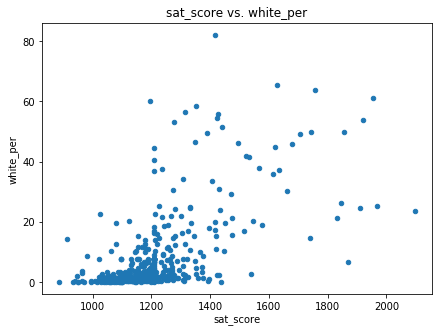

In [133]:
combined_1.plot(x='sat_score', y='white_per', kind='scatter', title='sat_score vs. white_per', \
                  figsize=(7,5))


As seen above, it doesn't appear that there's a very strong correlation between `sat_score` and `white_per`. If there was a very strong correlation, we would expect all of the points to line up. Instead, there's a large cluster of schools, and then a few others going off in different directions.

However, there's an interesting cluster of points at the bottom left where `white_per` and `sat_score` are both low. This cluster may be what's making the r value moderate-strong (0.63).

### Zooming in:

(0, 30)

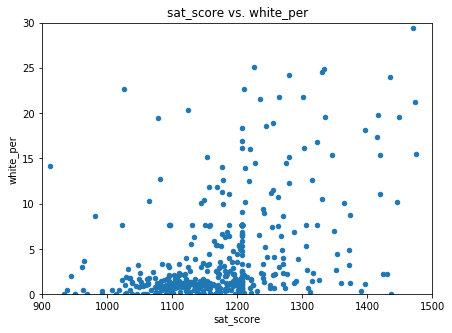

In [146]:
ax = combined_1.plot(x='sat_score', y='white_per', kind='scatter', figsize=(7,5))

ax.set_title('sat_score vs. white_per')

# Set x-axis view limits
ax.set_xlim(900,1500)

# Set y-axis view limits
ax.set_ylim(0,30)


### > asian_per (0.52)

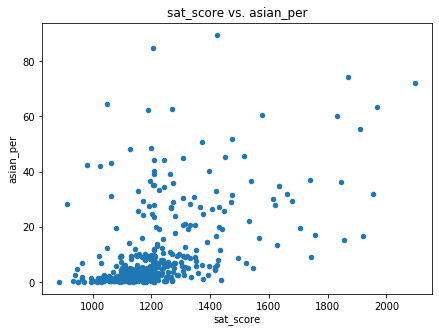

In [147]:
combined_1.plot(x='sat_score', y='asian_per', kind='scatter', title='sat_score vs. asian_per', \
                  figsize=(7,5))


### > black_per (-0.29)

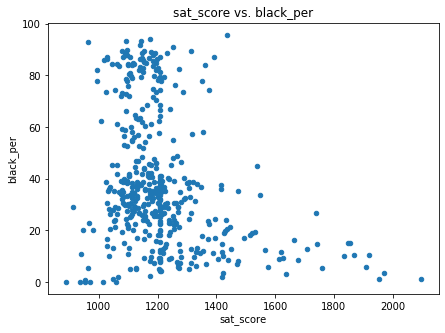

In [148]:
combined_1.plot(x='sat_score', y='black_per', kind='scatter', title='sat_score vs. black_per', \
                  figsize=(7,5))


### > hispanic_per (-0.34)

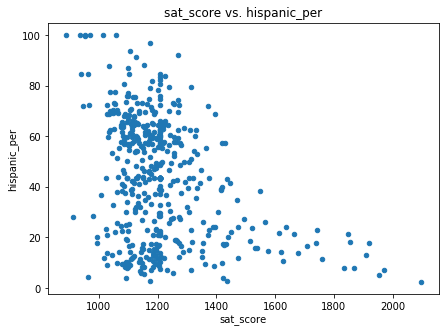

In [149]:
combined_1.plot(x='sat_score', y='hispanic_per', kind='scatter', title='sat_score vs. hispanic_per', \
                  figsize=(7,5))


### Conclusion:
In general, the white and asian races tend to have a higher SAT score than the black and hispanic races.

## Exploring Gender and SAT Scores

### > female_per (0.09)

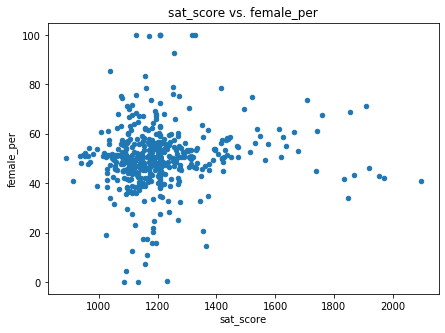

In [150]:
combined_1.plot(x='sat_score', y='female_per', kind='scatter', title='sat_score vs. female_per', \
                  figsize=(7,5))


### > male_per (-0.09)

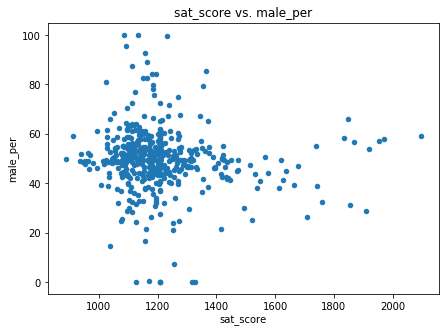

In [151]:
combined_1.plot(x='sat_score', y='male_per', kind='scatter', title='sat_score vs. male_per', \
                  figsize=(7,5))


### Conclusion:
The SAT seems to be fair to both women and men.

## Exploring AP Exam Information and SAT Scores

In the U.S., high school students take Advanced Placement (AP) exams to earn college credit. There are AP exams for many different subjects.

### > AP Test Takers (0.51)

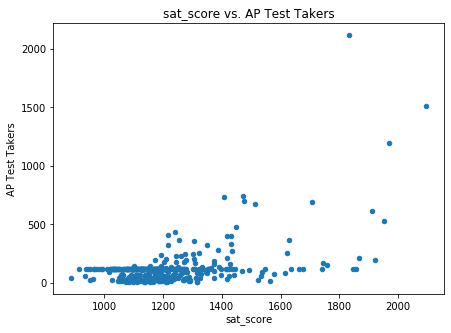

In [152]:
combined_1.plot(x='sat_score', y='AP Test Takers', kind='scatter', \
                  title='sat_score vs. AP Test Takers', figsize=(7,5))


### Conclusion:

There is a strong correlation between the number of students that take the AP exam (`AP Test Takers`) with the school's SAT scores (`sat_score`).

## Exploring English Language Learners (ell) and SAT Scores

### > ell_percent (-0.35)
English Language Learners

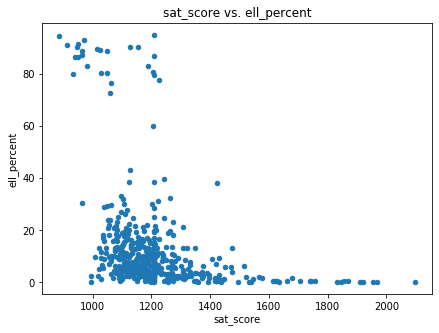

In [153]:
combined_1.plot(x='sat_score', y='ell_percent', kind='scatter', title='sat_score vs. ell_percent', \
                  figsize=(7,5))


In the above plot, we can see that there is a __moderate-strong__ negative correlation between `sat_score` and `ell_percent`.

## Mapping the Schools with Basemap

Let's map out `ell_percent` by __school district__. The map will show us which areas of the city have a lot of __English language learners (ell)__.

The [Basemap package](http://matplotlib.org/basemap/) enables us to create geographic maps, plot points over them, and then draw coastlines and other features.

We extracted the coordinates for all of the schools earlier, and stored them in the `latitude` and `longitude` columns. The coordinates will enable us to plot all of the schools on a map of New York City.

C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


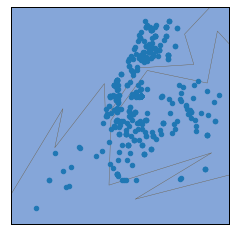

In [157]:
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    # resolution of boundary database to use. Can be c (crude, which is the default one), l (low), i (intermediate), h (high), f (full) or None
    resolution='l'
)

m.drawmapboundary(fill_color='#85A6D9')

m.drawcoastlines(color='#6D5F47', linewidth=.4)

m.drawrivers(color='#6D5F47', linewidth=.4)


longitudes = combined_1["longitude"].tolist()

latitudes = combined_1["latitude"].tolist()

m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True)

plt.show()


C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


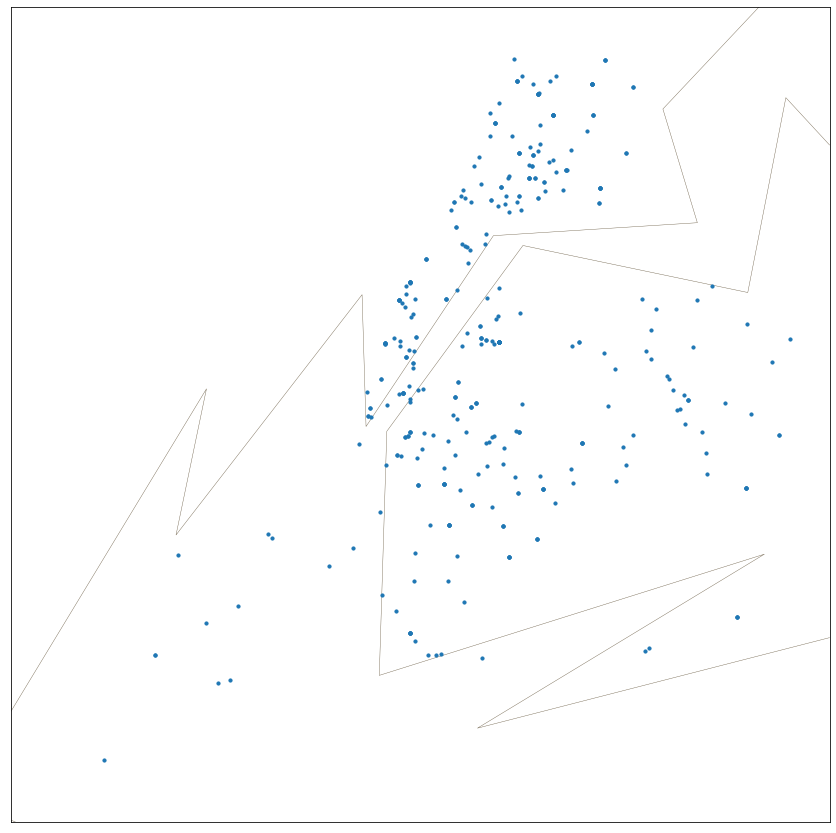

In [158]:
fig = plt.figure(figsize=(20,15))

#plt.title('Scaled Up Earth With Coastlines')

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    # resolution of boundary database to use. Can be c (crude, which is the default one), l (low), i (intermediate), h (high), f (full) or None
    resolution='l'
)

#m.drawmapboundary(fill_color='#85A6D9')

m.drawcoastlines(color='#6D5F47', linewidth=.4)

m.drawrivers(color='#6D5F47', linewidth=.4)


#longitudes = combined_1["longitude"].tolist()

#latitudes = combined_1["latitude"].tolist()

# I see there is no difference when not passing the zorder argument (line below). I investigated and
# the zorder default value is "1"
m.scatter(longitudes, latitudes, s=10, zorder=2, latlon=True)
#m.scatter(longitudes, latitudes, s=20, latlon=True)
#m.scatter(longitudes, latitudes, s=5, latlon=True)


#m.drawcoastlines()

plt.show()


## Plotting Out Statistics

From the map on the previous screen, we can see that school density is highest in Manhattan (the top of the map), and lower in Brooklyn, the Bronx, Queens, and Staten Island.

Now that we've plotted the school locations, we can begin to display meaningful information on the maps, such as the percentage of English language learners by area.

We can shade each point in the scatterplot by passing the keyword [argument `c`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) into the `scatter()` method. This argument accepts a variable containing a sequence of numbers, assigns different colors to those numbers, and then shades the points on the plot associated with those numbers accordingly.

The method will convert the sequence of numbers we pass into the c keyword argument to values ranging from __0__ to __1__. It will then map these values to a __colormap__. Matplotlib has quite a few default [colormaps](http://matplotlib.org/users/colormaps.html). In our case, we'll use the `cool` colormap which depicts teal (blue-green) points for low numbers and purple points for high numbers.

We can specify the __colormap__ we want to use by passing the `cmap` keyword argument to the `scatter()` method.


C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


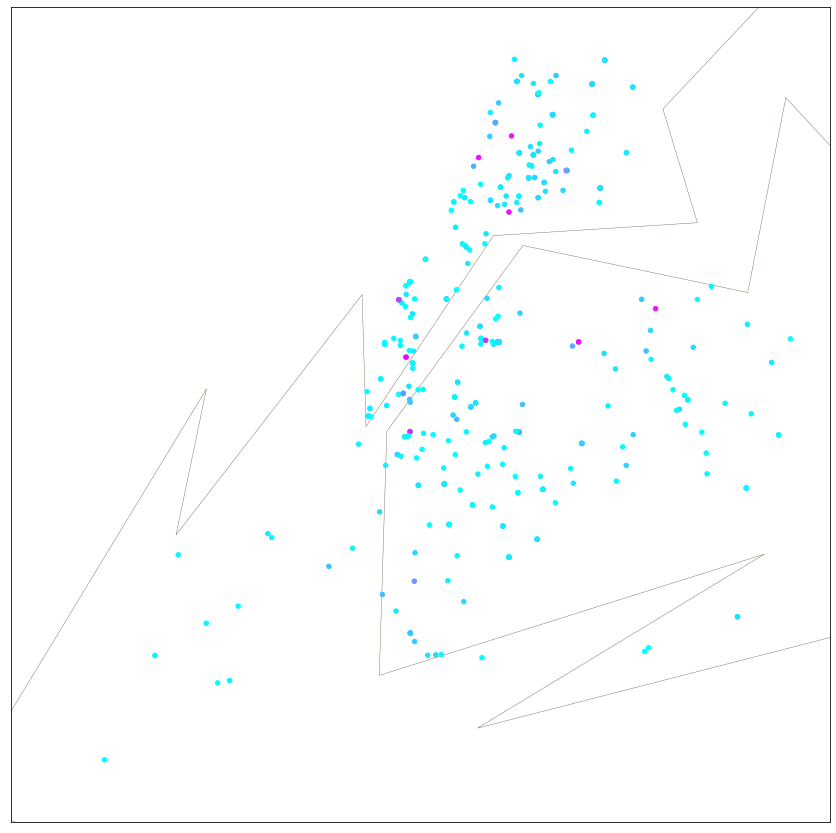

In [159]:
fig = plt.figure(figsize=(20,15))

#plt.title('Scaled Up Earth With Coastlines')

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    # resolution of boundary database to use. Can be c (crude, which is the default one), l (low), i (intermediate), h (high), f (full) or None
    resolution='l'
)

#m.drawmapboundary(fill_color='#85A6D9')

m.drawcoastlines(color='#6D5F47', linewidth=.4)

m.drawrivers(color='#6D5F47', linewidth=.4)


#longitudes = combined_1["longitude"].tolist()

#latitudes = combined_1["latitude"].tolist()

# I see there is no difference when not passing the zorder argument (line below). I investigated and
# the zorder default value is "1"
#m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined_1["ell_percent"], \
#          cmap="summer")
m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined_1["ell_percent"], \
          cmap="cool")
#m.scatter(longitudes, latitudes, s=20, latlon=True)
#m.scatter(longitudes, latitudes, s=5, latlon=True)


plt.show()


## Calculating District-Level Statistics

Apparently, it looks like uptown Manhattan and parts of Queens have a higher `ell_percent`. One way to make very granular statistics easier to read is to __aggregate__ them. In this case, we can __aggregate by district__, which will enable us to plot `ell_percent` district-by-district instead of school-by-school.

In [166]:
school_district_unique_values = combined_1["school_district"].unique()

print( school_district_unique_values )
print( type(school_district_unique_values) )
print( school_district_unique_values.shape )
print( school_district_unique_values.size )

#print("\n")
print( "\nArray stores elements of type:", school_district_unique_values.dtype )


['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28'
 '29' '30' '31' '32' '75' '79']
<class 'numpy.ndarray'>
(34,)
34

Array stores elements of type: object


In [167]:
grouped = combined_1.groupby("school_district")

In [168]:
_29_group = grouped.get_group("29")

print(_29_group)


        DBN                                        SCHOOL NAME  \
429  29Q248                         QUEENS PREPARATORY ACADEMY   
430  29Q259  PATHWAYS COLLEGE PREPARATORY SCHOOL: A COLLEGE...   
431  29Q265                  EXCELSIOR PREPARATORY HIGH SCHOOL   
432  29Q272  GEORGE WASHINGTON CARVER HIGH SCHOOL FOR THE S...   
433  29Q283  PREPARATORY ACADEMY FOR WRITERS: A COLLEGE BOA...   
434  29Q326                            CAMBRIA HEIGHTS ACADEMY   
435  29Q492  MATHEMATICS, SCIENCE RESEARCH AND TECHNOLOGY M...   
436  29Q494  LAW, GOVERNMENT AND COMMUNITY SERVICE HIGH SCHOOL   
437  29Q496  BUSINESS, COMPUTER APPLICATIONS & ENTREPRENEUR...   
438  29Q498               HUMANITIES & ARTS MAGNET HIGH SCHOOL   

    Num of SAT Test Takers SAT Critical Reading Avg. Score  \
429                     52                             360   
430                     46                             401   
431                     49                             402   
432                     5

In [169]:
print( grouped.mean() )

print( type(grouped.mean()) )


                   sat_score  AP Test Takers  Total Exams Taken  \
school_district                                                   
01               1305.777778      103.747126         153.250000   
02               1276.606614      114.718302         176.903846   
03               1253.871594      137.164300         212.867647   
04               1191.142857      123.482759         174.857143   
05               1217.220428       82.537931         114.700000   
06               1157.109480      106.156740         155.931818   
07               1141.200503       79.103448         120.764706   
08               1159.867888      107.229885         156.261905   
09               1128.645649       62.625392          90.272727   
10               1196.764591      125.812808         210.678571   
11               1163.232029       83.234120         121.289474   
12               1107.756268       91.304598         136.680556   
13               1226.689364      196.708812         318.11111

In [170]:
districts = grouped.mean()

districts.info()


<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 01 to 79
Data columns (total 47 columns):
sat_score                               34 non-null float64
AP Test Takers                          34 non-null float64
Total Exams Taken                       34 non-null float64
Number of Exams with scores 3 4 or 5    34 non-null float64
NUMBER OF STUDENTS / SEATS FILLED       34 non-null float64
NUMBER OF SECTIONS                      34 non-null float64
AVERAGE CLASS SIZE                      34 non-null float64
SIZE OF SMALLEST CLASS                  34 non-null float64
SIZE OF LARGEST CLASS                   34 non-null float64
schoolyear                              34 non-null float64
frl_percent                             34 non-null float64
total_enrollment                        34 non-null float64
ell_num                                 34 non-null float64
ell_percent                             34 non-null float64
sped_num                                34 non-null float64
s

In [171]:
print( districts.head() )

                   sat_score  AP Test Takers  Total Exams Taken  \
school_district                                                   
01               1305.777778      103.747126         153.250000   
02               1276.606614      114.718302         176.903846   
03               1253.871594      137.164300         212.867647   
04               1191.142857      123.482759         174.857143   
05               1217.220428       82.537931         114.700000   

                 Number of Exams with scores 3 4 or 5  \
school_district                                         
01                                         120.743929   
02                                         143.012124   
03                                         165.235684   
04                                         144.011353   
05                                         137.892715   

                 NUMBER OF STUDENTS / SEATS FILLED  NUMBER OF SECTIONS  \
school_district                                         

In [172]:
districts.reset_index(inplace=True)

In [173]:
districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 48 columns):
school_district                         34 non-null object
sat_score                               34 non-null float64
AP Test Takers                          34 non-null float64
Total Exams Taken                       34 non-null float64
Number of Exams with scores 3 4 or 5    34 non-null float64
NUMBER OF STUDENTS / SEATS FILLED       34 non-null float64
NUMBER OF SECTIONS                      34 non-null float64
AVERAGE CLASS SIZE                      34 non-null float64
SIZE OF SMALLEST CLASS                  34 non-null float64
SIZE OF LARGEST CLASS                   34 non-null float64
schoolyear                              34 non-null float64
frl_percent                             34 non-null float64
total_enrollment                        34 non-null float64
ell_num                                 34 non-null float64
ell_percent                             34 non-null float6

In [175]:
print( districts.head() )

  school_district    sat_score  AP Test Takers  Total Exams Taken  \
0              01  1305.777778      103.747126         153.250000   
1              02  1276.606614      114.718302         176.903846   
2              03  1253.871594      137.164300         212.867647   
3              04  1191.142857      123.482759         174.857143   
4              05  1217.220428       82.537931         114.700000   

   Number of Exams with scores 3 4 or 5  NUMBER OF STUDENTS / SEATS FILLED  \
0                            120.743929                         101.700899   
1                            143.012124                         154.190130   
2                            165.235684                         149.921181   
3                            144.011353                         132.358343   
4                            137.892715                         105.717564   

   NUMBER OF SECTIONS  AVERAGE CLASS SIZE  SIZE OF SMALLEST CLASS  \
0            4.506460           22.634468      

In [176]:
districts[:5]["ell_percent"]

0    16.422222
1    14.974137
2     9.948170
3     6.171429
4     5.820000
Name: ell_percent, dtype: float64

In [177]:
combined_1[:5]["ell_percent"]

0    22.3
1    21.1
2     5.0
3     4.0
4    11.2
Name: ell_percent, dtype: float64

## Plotting Percent of English Learners by District

Now that we've taken the means of all of the columns, we can plot out `ell_percent` by district. Not only did we find the mean of `ell_percent`, but we also took the means of the `longitude` and `latitude` columns, which will give us the coordinates for the __center__ of each district.


C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


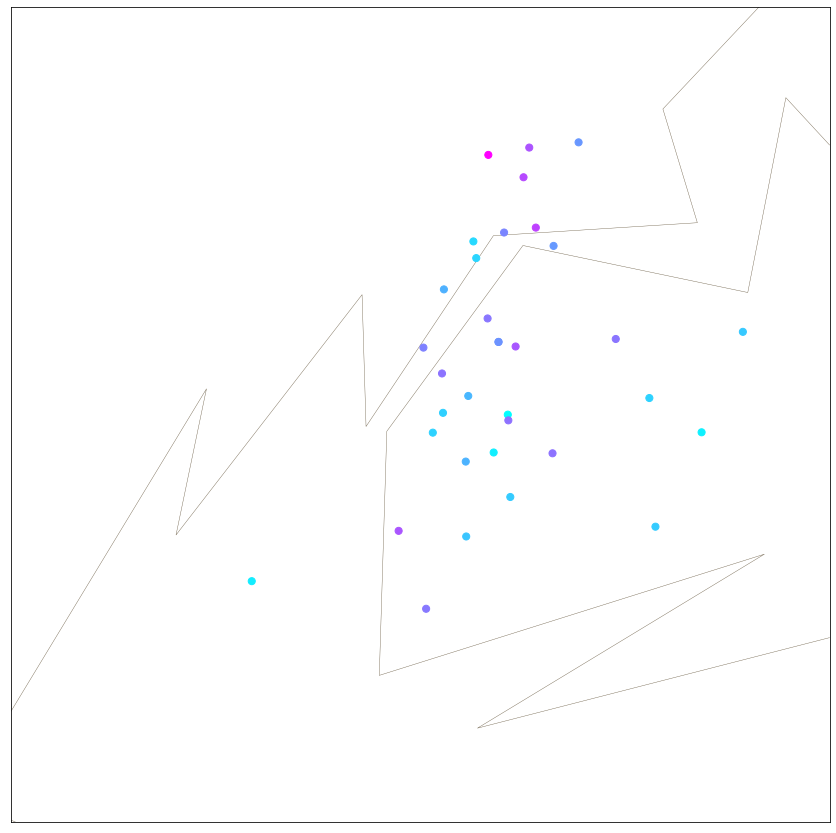

In [181]:
fig = plt.figure(figsize=(20,15))

#plt.title('Scaled Up Earth With Coastlines')

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    # resolution of boundary database to use. Can be c (crude, which is the default one), l (low), i (intermediate), h (high), f (full) or None
    resolution='l'
)

#m.drawmapboundary(fill_color='#85A6D9')

m.drawcoastlines(color='#6D5F47', linewidth=.4)

m.drawrivers(color='#6D5F47', linewidth=.4)


longitudes = districts["longitude"].tolist()

latitudes = districts["latitude"].tolist()


# I see there is no difference when not passing the zorder argument (line below). I investigated and
# the zorder default value is "1"
#m.scatter(longitudes, latitudes, s=20, zorder=2, latlon=True, c=combined_1["ell_percent"], \
#          cmap="summer")
m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["ell_percent"], \
          cmap="cool")
#m.scatter(longitudes, latitudes, s=20, latlon=True, c=districts["ell_percent"], cmap="cool")
#m.scatter(longitudes, latitudes, s=20, latlon=True)
#m.scatter(longitudes, latitudes, s=5, latlon=True)


plt.show()


### Next, I am curious to observe the following columns:

* sat_score, female_per, male_per, hispanic_per

### > sat_score

C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':
C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


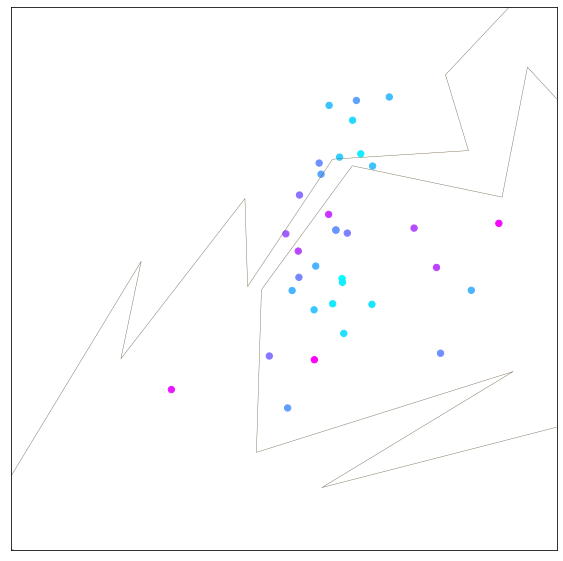

In [189]:
#fig = plt.figure(figsize=(20,15))
fig = plt.figure(figsize=(15,10))

#plt.title('Scaled Up Earth With Coastlines')

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    # resolution of boundary database to use. Can be c (crude, which is the default one), l (low), i (intermediate), h (high), f (full) or None
    resolution='l'
)

#m.drawmapboundary(fill_color='#85A6D9')

m.drawcoastlines(color='#6D5F47', linewidth=.4)

m.drawrivers(color='#6D5F47', linewidth=.4)


longitudes = districts["longitude"].tolist()

latitudes = districts["latitude"].tolist()


# I see there is no difference when not passing the zorder argument (line below). I investigated and
# the zorder default value is "1"
#m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["ell_percent"], \
#          cmap="cool")
m.scatter(longitudes, latitudes, s=40, latlon=True, c=districts["sat_score"], cmap="cool")


plt.show()


### > female_per

C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


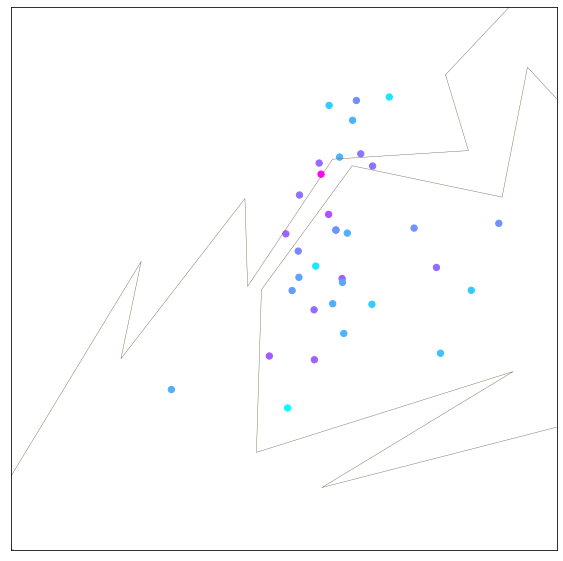

In [190]:
#fig = plt.figure(figsize=(20,15))
fig = plt.figure(figsize=(15,10))

#plt.title('Scaled Up Earth With Coastlines')

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    # resolution of boundary database to use. Can be c (crude, which is the default one), l (low), i (intermediate), h (high), f (full) or None
    resolution='l'
)

#m.drawmapboundary(fill_color='#85A6D9')

m.drawcoastlines(color='#6D5F47', linewidth=.4)

m.drawrivers(color='#6D5F47', linewidth=.4)


longitudes = districts["longitude"].tolist()

latitudes = districts["latitude"].tolist()


# I see there is no difference when not passing the zorder argument (line below). I investigated and
# the zorder default value is "1"
#m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["ell_percent"], \
#          cmap="cool")
m.scatter(longitudes, latitudes, s=40, latlon=True, c=districts["female_per"], cmap="cool")


plt.show()


### > male_per

C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


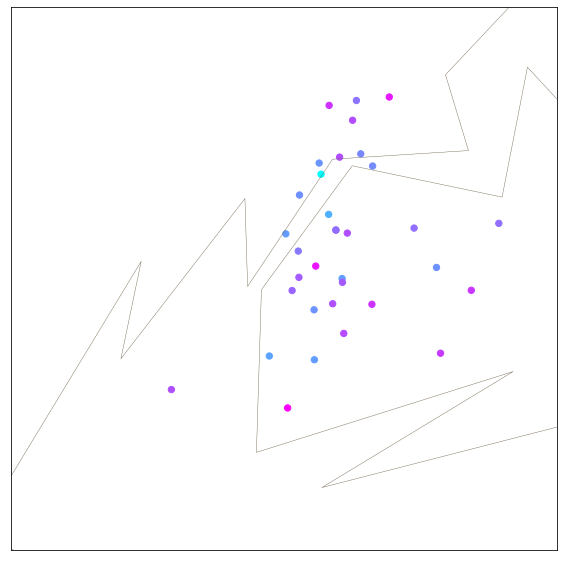

In [191]:
#fig = plt.figure(figsize=(20,15))
fig = plt.figure(figsize=(15,10))

#plt.title('Scaled Up Earth With Coastlines')

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    # resolution of boundary database to use. Can be c (crude, which is the default one), l (low), i (intermediate), h (high), f (full) or None
    resolution='l'
)

#m.drawmapboundary(fill_color='#85A6D9')

m.drawcoastlines(color='#6D5F47', linewidth=.4)

m.drawrivers(color='#6D5F47', linewidth=.4)


longitudes = districts["longitude"].tolist()

latitudes = districts["latitude"].tolist()


# I see there is no difference when not passing the zorder argument (line below). I investigated and
# the zorder default value is "1"
#m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["ell_percent"], \
#          cmap="cool")
m.scatter(longitudes, latitudes, s=40, latlon=True, c=districts["male_per"], cmap="cool")


plt.show()


### > hispanic_per

C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


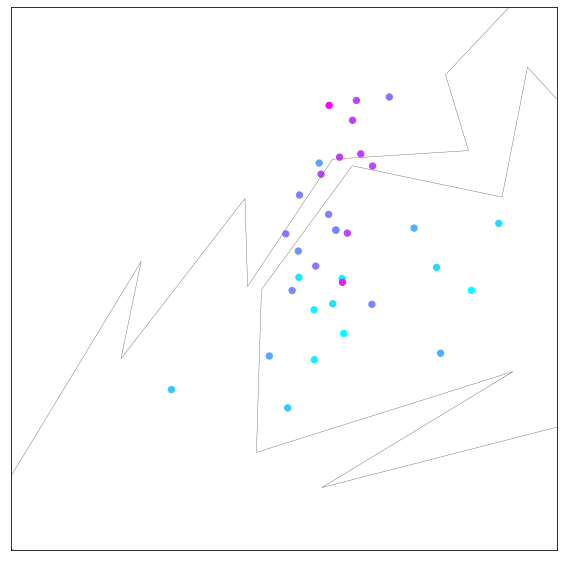

In [194]:
#fig = plt.figure(figsize=(20,15))
fig = plt.figure(figsize=(15,10))

#plt.title('Scaled Up Earth With Coastlines')

m = Basemap(
    projection='merc', 
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272,
    # resolution of boundary database to use. Can be c (crude, which is the default one), l (low), i (intermediate), h (high), f (full) or None
    resolution='l'
)

#m.drawmapboundary(fill_color='#85A6D9')

m.drawcoastlines(color='#6D5F47', linewidth=.4)

m.drawrivers(color='#6D5F47', linewidth=.4)


longitudes = districts["longitude"].tolist()

latitudes = districts["latitude"].tolist()


# I see there is no difference when not passing the zorder argument (line below). I investigated and
# the zorder default value is "1"
#m.scatter(longitudes, latitudes, s=50, zorder=2, latlon=True, c=districts["ell_percent"], \
#          cmap="cool")
m.scatter(longitudes, latitudes, s=40, latlon=True, c=districts["hispanic_per"], cmap="cool")


plt.show()


### Additional Observation/Conclusion:

- When analyzing correlations we should __plot the data__ instead of relying _only_ on the r value
